# Hotel Recommendation using Customer Feed

# OBJECTIVE

The aim of this project is to create a Hotel Recommendation System using customer feed data to provide personalized hotel suggestions.<br> 
This system leverages various data points from the customer feed, such as booking patterns, preferences, and demographic information, to recommend hotels that align with each user's unique needs and preferences.<br>
<br>

**Key Objectives** :<br>

**Personalized Recommendations**: Utilize customer feed data to tailor hotel suggestions based on individual user preferences<br>
<br>
**Data-Driven Decision Making**: Employ data analytics and machine learning algorithms to analyze customer feed data, identifying patterns and trends to predict user preferences accurately.<br>
<br>

**Improved User Experience**: Enhance the user experience by recommending hotels that match their preferred features, amenities, and locations based on the data from their feed.<br>


## SYSTEM ARCHITECTURE DIAGRAM

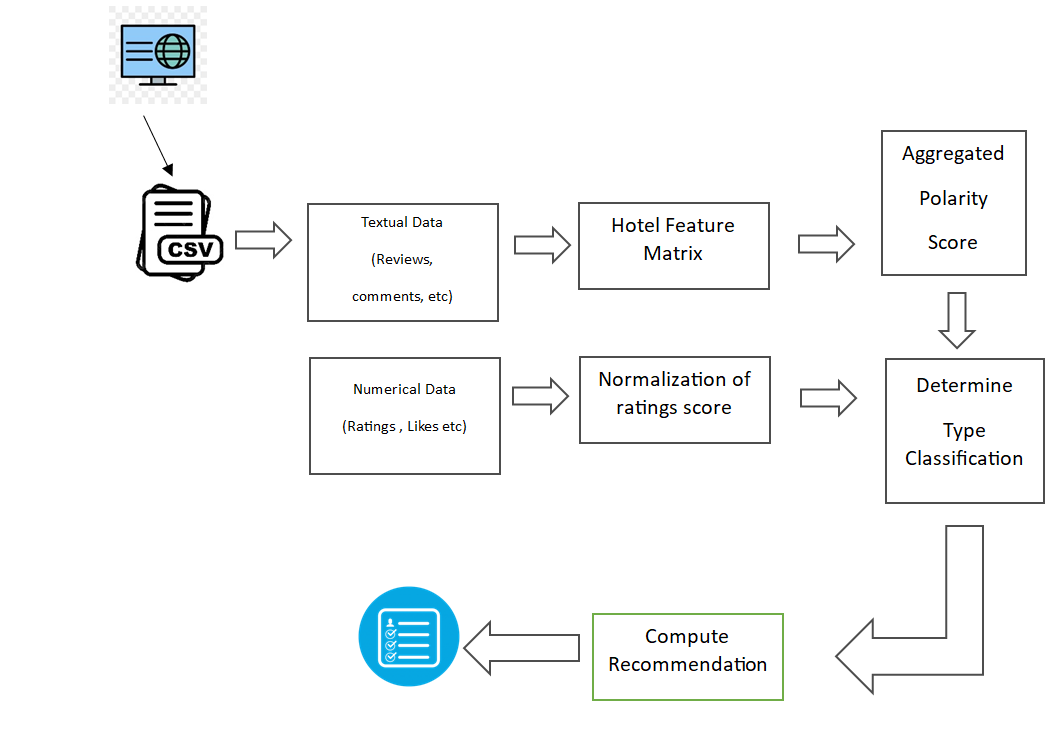

## ABOUT THE DATASET

The Data Set that we are using is the "Indian Hotels on Goibibo" obtained from Kraggle ("https://www.kaggle.com/datasets/PromptCloudHQ/hotels-on-goibibo") <br>
The Data Set is a csv file. It contains **4000** data entries, containing mostly texts and numericals.<br>


The datas in the data set is obtained from Goibibo.com and contains 4000 unique hotels from all over india with 36 parameters: <br>

**address, area, city, country, guest_recommendation, hotel_brand, hotel_category, hotel_description, hotel_facilities, hotel_star_rating, latitude, longitude, pageurl, point_of_interest, property_name, property_type, review_count_by_category, room_area, room_count, room_facilities, room_type, site_review_count, site_review_rating, site_stay_review_rating, state** <br>

## IMPORTING REQUIRED LIBRARIES ##

In [1]:
#importing required libraries 
import pandas as pd   # Pandas librabry is used for data analysis and data manipulation 
import numpy as np    # Numpy librabry are used for high level mathematical operations 
import seaborn as sns   # Seaborn library is used for making statistical graphics as visualization Tool 
import matplotlib.pyplot as plt  # Matplotlib library is used for Low level graph plotting as visualization Tool 
import nltk    # NLTK (Natural Language Toolkit) used for giving insights about texts 
from nltk.tokenize import word_tokenize   # NLTK Tokenizer Package Tokenizes and divide strings into lists of substrings 
from nltk.corpus import stopwords    # NLTK Corpus package defines a collection of corpus reader classes 
import string   # String packages allows us to access the constants and functions 
from wordcloud import WordCloud  # wordcloud visualization package commonly used to display tags or keywords 
import folium     # folium library that helps us create several types of Leaflet maps 
from sklearn.neighbors import KNeighborsRegressor   # K-Nearest Neighbors model for regression
from sklearn.linear_model import LinearRegression  # Linear Regression model
from sklearn.ensemble import RandomForestRegressor # Random Forest model for regression
from sklearn.svm import SVR  # Support Vector Regressor model
from sklearn.model_selection import train_test_split  # To split the dataset into training and testing sets
from sklearn.preprocessing import LabelEncoder, StandardScaler  # For encoding categorical data and standardizing features
from scipy.sparse.linalg import svds  # For matrix factorization using Singular Value Decomposition (SVD)


## IMPORTING DATASET ##

In [8]:
df = pd.read_csv ('Hotel_Goibibo.csv')
df

,additional_info,address,area,city,country,crawl_date,guest_recommendation,hotel_brand,hotel_category,hotel_description,...,room_count,room_facilities,room_type,similar_hotel,site_review_count,site_review_rating,site_stay_review_rating,sitename,state,uniq_id
0,Room Service|Internet Access|Restaurant|Free I...,"15th Mile, N.H.21,Manali, District Kullu,Himac...",Others,Manali,India,2016-07-24,85.0,NaN,gostays,The standard check-in time is 12:00 PM and the...,...,17,Room Service |Basic Bathroom Amenities|Cable /...,Deluxe Room,https://www.goibibo.com/hotels/woodchime-homes...,87.0,4.0,Service Quality::3.9|Amenities::3.7|Food and D...,goibibo,Himachal Pradesh,2c8db027d43a9452a43e88eb30d9f983
1,Room Service|Gym/Spa,"A-585, Sushant Lok-1 ,Near Iffco Chowk Metro S...",Sushant Lok,Gurgaon,India,2016-07-24,87.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,18,Room Service |Air Conditioning |Basic Bathroom...,Deluxe Room With Free WIFI,https://www.goibibo.com/hotels/stepinn-iffco-c...,8.0,4.5,Service Quality::4.7|Amenities::4.7|Food and D...,goibibo,Haryana,e98f69f889c0235e6dc480e7df6de0de
2,Restaurant|Swimming Pool,"Cobra Vaddo,Calungate Baga Road, Bardez, Calan...",Calangute Area,Goa,India,2016-07-24,50.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,15,Room Service |Air Conditioning |Cable / Satell...,Standard Room,https://www.goibibo.com/hotels/sunrise-beach-r...,2.0,2.5,Service Quality::2.5|Amenities::2.5|Food and D...,goibibo,Goa,9b59d00eaffc273d83000ed7dcda0e83
3,NaN,Simsa,Village Simsa,Manali,India,2016-07-24,100.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,24,Basic Bathroom Amenities|Cable / Satellite / P...,Deluxe Room,https://www.goibibo.com/hotels/green-cottages-...,1.0,5.0,Service Quality::5.0|Amenities::5.0|Food and D...,goibibo,Himachal Pradesh,df0971f9c5501af112485ee28b468ce5
4,Internet Access|Restaurant,"8180 Street No.-6,Arakashan Road,Paharganj",Paharganj,Delhi,India,2016-07-24,63.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,20,Basic Bathroom Amenities|Cable / Satellite / P...,Standard Room Non AC,https://www.goibibo.com/hotels/delhi-continent...,121.0,2.8,Service Quality::2.7|Amenities::2.6|Food and D...,goibibo,Delhi,0c3514344c9cda8718f558e84bdb44ef
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,Room Service,"Vijayvargiya Tower,Tower Chowk, Ujjain (M.P.)",Freeganj Area,Ujjain,India,2016-06-26,NaN,NaN,regular,The standard check-in time is 12:00 PM and the...,...,10,NaN,Two bed AC Room,https://www.goibibo.com/hotels/avantika-hotel-...,NaN,NaN,Service Quality::|Amenities::|Food and Drinks:...,goibibo,Madhya Pradesh,9e59170d5f79ebb7b590ed339e3762a4
3996,Room Service,"Anjali Circle ,Opposite Petrol Pump,Vasna Road",Ellis Bridge Area,Ahmedabad,India,2016-06-26,NaN,NaN,regular,The standard check-in time is 02:00 PM and the...,...,12,Room Service |Air Conditioning |Basic Bathroom...,Non AC Room,https://www.goibibo.com/hotels/heritage-hotel-...,NaN,NaN,Service Quality::|Amenities::|Food and Drinks:...,goibibo,Gujarat,c0f3e4dac166df972277c86243b27560
3997,Room Service|Restaurant,"Marol Maroshi Road, Near To Marol naka FireBri...",Andheri,Mumbai,India,2016-06-26,83.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,41,Air Conditioning |Cable / Satellite / Pay TV a...,Gold Room,https://www.goibibo.com/hotels/marigold-reside...,77.0,4.0,Service Quality::3.9|Amenities::3.8|Food and D...,goibibo,Maharashtra,38b95f3e67046131254d3e2106b9d8fa
3998,Room Service,"Station Road, B Deoghar Ho, Deoghar Jharkhand",Railway Station Road,Deoghar,India,2016-06-26,NaN,NaN,regular,The standard check-in time is 02:00 PM and the...,...,4,Room Service |Air Conditioning |Alarm Clock|Ba...,AC DELUXE ROOM,https://www.goibibo.com/hotels/yashoda-interna...,NaN,NaN,Service Quality::|Amenities::|Food and Drinks:...,goibibo,Jharkhand,eb8597d68508134dedc811c2a4fc42b4


In [9]:
df.shape  #Checking the shape of the dataset#

(4000, 36)

In [10]:
#Changing column to lower case for easy manipulation and cleaning 
df.columns = [x.lower() for x in df.columns]

In [11]:
df.columns #Column list and name

Index(['additional_info', 'address', 'area', 'city', 'country', 'crawl_date',
       'guest_recommendation', 'hotel_brand', 'hotel_category',
       'hotel_description', 'hotel_facilities', 'hotel_star_rating',
       'image_count', 'latitude', 'locality', 'longitude', 'pageurl',
       'point_of_interest', 'property_id', 'property_name', 'property_type',
       'province', 'qts', 'query_time_stamp', 'review_count_by_category',
       'room_area', 'room_count', 'room_facilities', 'room_type',
       'similar_hotel', 'site_review_count', 'site_review_rating',
       'site_stay_review_rating', 'sitename', 'state', 'uniq_id'],
      dtype='object')

In [12]:
#Information about the columns in another Data Frame called df.
analysis = pd.DataFrame({
    'Unique': df.nunique(),
    'Null': df.isnull().sum,
    'NullPercent': df.isna().sum()/ len(df),
    'Type': df.dtypes.values
})
display (analysis)

,Unique,Null,NullPercent,Type
additional_info,57,<bound method NDFrame._add_numeric_operations....,0.20200,object
address,3971,<bound method NDFrame._add_numeric_operations....,0.00000,object
area,1415,<bound method NDFrame._add_numeric_operations....,0.00875,object
city,558,<bound method NDFrame._add_numeric_operations....,0.00000,object
country,1,<bound method NDFrame._add_numeric_operations....,0.00000,object
crawl_date,7,<bound method NDFrame._add_numeric_operations....,0.00000,object
guest_recommendation,70,<bound method NDFrame._add_numeric_operations....,0.39600,float64
hotel_brand,95,<bound method NDFrame._add_numeric_operations....,0.90275,object
hotel_category,2,<bound method NDFrame._add_numeric_operations....,0.00000,object
hotel_description,1828,<bound method NDFrame._add_numeric_operations....,0.00425,object


The analysis shows us the **unique values**, **null values**, **null percentage** and **data type** of each column

## DROPPING COLUMNS ##
We are dropping the columns which are not relevant for the Analysis or Training of the model or Contains a high number of Null values  

In [13]:
df= df.drop(['crawl_date' ,'image_count','province','qts','query_time_stamp','similar_hotel','sitename','uniq_id','country','hotel_category','province', 'property_id','pageurl','room_area','locality'], axis = 1)

##### Dropped **15** columns :<br> 
**country**<br>  **crawl_date**<br>
 **image_count**<br>**province**<br> **qts**<br>**query_time_stamp**<br>**similar_hotel**<br>**sitename**<br>**uniq_id**<br> **hotel_category** <br>**province**, <br>**property_id**<br>**pageurl**<br>**room_area**<br>**locality'**

## REARRANGING THE COLUMNS ##
**This helps us to understand the dataset with more clarity**

In [14]:
df = df.reindex(columns=[
    'property_name', 
    'state', 
    'city', 
    'area', 
    'address', 
    'hotel_star_rating', 
    'property_type', 
    'hotel_brand', 
    'hotel_description', 
    'hotel_facilities', 
    'additional_info', 
    'room_facilities', 
    'room_type', 
    'room_count', 
    'point_of_interest', 
    'site_review_rating', 
    'site_stay_review_rating', 
    'review_count_by_category', 
    'site_review_count', 
    'guest_recommendation', 
    'latitude', 
    'longitude'
])


## RENAMING THE COLUMNS ## 

In [15]:
df.rename(columns={
    'additional_info': 'property_info',
    'site_review_rating': 'rating',
    'site_stay_review_rating': 'additional_rating'
}, inplace=True)


additional_info is named to: **property_info** <br>
site_review_rating is named to :**rating**<br>
site_stay_review_rating is named to : **additional_rating**

In [16]:
df

,property_name,state,city,area,address,hotel_star_rating,property_type,hotel_brand,hotel_description,hotel_facilities,...,room_type,room_count,point_of_interest,rating,additional_rating,review_count_by_category,site_review_count,guest_recommendation,latitude,longitude
0,Baragarh Regency,Himachal Pradesh,Manali,Others,"15th Mile, N.H.21,Manali, District Kullu,Himac...",2,Resort,NaN,The standard check-in time is 12:00 PM and the...,Doctor on Call|Dry Cleaning|Laundry Service Av...,...,Deluxe Room,17,Hadimba Temple|Naggar Village|Himalayan Nyingm...,4.0,Service Quality::3.9|Amenities::3.7|Food and D...,positive reviews::74|critical reviews::13|revi...,87.0,85.0,32.139387,77.154660
1,Asian Suites A- 585,Haryana,Gurgaon,Sushant Lok,"A-585, Sushant Lok-1 ,Near Iffco Chowk Metro S...",0,Guest House,NaN,The standard check-in time is 12:00 PM and the...,Airport Transfer Available / Surcharge|Banquet...,...,Deluxe Room With Free WIFI,18,Sushant Lok|Sahara Mall|Amity International Sc...,4.5,Service Quality::4.7|Amenities::4.7|Food and D...,positive reviews::8|critical reviews::0|review...,8.0,87.0,28.472097,77.072546
2,Bevvan Resort,Goa,Goa,Calangute Area,"Cobra Vaddo,Calungate Baga Road, Bardez, Calan...",0,Resort,NaN,The standard check-in time is 12:00 PM and the...,Swimming Pool|Bar / Lounge |Laundry Service Av...,...,Standard Room,15,"Anjuna Beach|Calangute Beach|Titos lane, baga|...",2.5,Service Quality::2.5|Amenities::2.5|Food and D...,positive reviews::1|critical reviews::1|review...,2.0,50.0,15.548398,73.757634
3,Apple Inn Cottage,Himachal Pradesh,Manali,Village Simsa,Simsa,2,Cottage,NaN,The standard check-in time is 12:00 PM and the...,Doctor on Call|Dry Cleaning|Laundry Service Av...,...,Deluxe Room,24,The Mall|Tibetian Monastery|Vashisht Hot Baths...,5.0,Service Quality::5.0|Amenities::5.0|Food and D...,positive reviews::1|critical reviews::0|review...,1.0,100.0,32.223603,77.185900
4,Anmol Hotel Pvt.Ltd,Delhi,Delhi,Paharganj,"8180 Street No.-6,Arakashan Road,Paharganj",2,Hotel,NaN,The standard check-in time is 12:00 PM and the...,Internet Access - Surcharge|Laundry Service Av...,...,Standard Room Non AC,20,Gaffar Market|YMCA Institute|Agrasen Boali|Cha...,2.8,Service Quality::2.7|Amenities::2.6|Food and D...,positive reviews::56|critical reviews::65|revi...,121.0,63.0,28.646777,77.212735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,Hotel Shreenath Palace,Madhya Pradesh,Ujjain,Freeganj Area,"Vijayvargiya Tower,Tower Chowk, Ujjain (M.P.)",0,Hotel,NaN,The standard check-in time is 12:00 PM and the...,Doctor on Call|Parking Facilities Available|Pa...,...,Two bed AC Room,10,Freeganj Area|Mahakal Temple|Kaliadeh Palace|B...,NaN,Service Quality::|Amenities::|Food and Drinks:...,NaN,NaN,NaN,23.179301,75.784910
3996,Hotel Sarvottam,Gujarat,Ahmedabad,Ellis Bridge Area,"Anjali Circle ,Opposite Petrol Pump,Vasna Road",0,Hotel,NaN,The standard check-in time is 02:00 PM and the...,Doctor on Call|Laundry Service Available|Parki...,...,Non AC Room,12,St Xaviers College|Sarkhej Roza|HCG Multi Spec...,NaN,Service Quality::|Amenities::|Food and Drinks:...,NaN,NaN,NaN,23.004443,72.552796
3997,Hotel Silver Inn,Maharashtra,Mumbai,Andheri,"Marol Maroshi Road, Near To Marol naka FireBri...",3,Hotel,NaN,The standard check-in time is 12:00 PM and the...,Banquet Facilities|Bar / Lounge |Currency Exch...,...,Gold Room,41,Mount Mary Church|Juhu Beach|Domestic Airport|...,4.0,Service Quality::3.9|Amenities::3.8|Food and D...,positive reviews::64|critical reviews::13|revi...,77.0,83.0,19.110926,72.879038
3998,Hotel Shivam International,Jharkhand,Deoghar,Railway Station Road,"Station Road, B Deoghar Ho, Deoghar Jharkhand",1,Hotel,NaN,The standard check-in time is 02:00 PM and the...,Business Center |Disabled Friendly Facilities ...,...,AC DELUXE ROOM,4,Ramakrishna Mission Vidyapeeth|Shivaganga|Rail...,NaN,Service Quality::|Amenities::|Food and Drinks:...,NaN,NaN,NaN,24.511849,86.696999


In [17]:
print (df.dtypes)

property_name                object
state                        object
city                         object
area                         object
address                      object
hotel_star_rating             int64
property_type                object
hotel_brand                  object
hotel_description            object
hotel_facilities             object
property_info                object
room_facilities              object
room_type                    object
room_count                    int64
point_of_interest            object
rating                      float64
additional_rating            object
review_count_by_category     object
site_review_count           float64
guest_recommendation        float64
latitude                    float64
longitude                   float64
dtype: object


**Object** is used for Texts <br>
**int64** is used for whole numbers <br>
**float64** is used for decimal numbers

**The data types are appropriate for the respective columns and require no further conversion.**

In [18]:
##checking for missing values 
print(df.isnull().sum())

property_name                  0
state                          0
city                           0
area                          35
address                        0
hotel_star_rating              0
property_type                  0
hotel_brand                 3611
hotel_description             17
hotel_facilities             194
property_info                808
room_facilities              270
room_type                      0
room_count                     0
point_of_interest            240
rating                      1584
additional_rating              0
review_count_by_category    1585
site_review_count           1584
guest_recommendation        1584
latitude                       0
longitude                      0
dtype: int64


### FIXING MISSING VALUE

In [19]:
## Fixing missing value of hotel brand to "no brand"
df['hotel_brand'].fillna('no brand', inplace=True)

## Fixing missing value of review_count_by_category to "positive reviews::0|critical reviews::0|reviews with images::0"
df['review_count_by_category'].fillna('positive reviews::0.0|critical reviews::0.0|reviews with images::0.0', inplace=True)

## Fixing missing value of site_review_count to 0.0
df['site_review_count'].fillna(0.0, inplace=True)

## Fixing missing value of guest_recommendation to 0
df['guest_recommendation'].fillna('0.0', inplace=True)

## Fixing missing value of rating to '0.0'
df['rating'].fillna('0.0', inplace=True)

##Fixing missing value of point_of_interest to "not available"
df['point_of_interest'].fillna('not available', inplace=True)


## Replacing all the missing values in the 'property_info' with the corresponding values from the 'hotel_facilities' 
df['property_info'].fillna(df['hotel_facilities'], inplace=True)


## Replacing all the missing values in the 'room_facilities' with the corresponding values from the 'hotel_facilities' 
df['room_facilities'].fillna(df['hotel_facilities'], inplace=True)

### DROPPING THE ROWS WHICH HAS VERY LESS MISSING VALUES ( < 200 )

In [20]:
df.dropna(subset=['area'], inplace=True)
df.dropna(subset=['hotel_description'], inplace=True)
df.dropna(subset=['hotel_facilities'], inplace=True)
df.dropna(subset=['property_info'], inplace=True)
df.dropna(subset=['room_facilities'], inplace=True)

In [21]:
print(df.isnull().sum())

property_name               0
state                       0
city                        0
area                        0
address                     0
hotel_star_rating           0
property_type               0
hotel_brand                 0
hotel_description           0
hotel_facilities            0
property_info               0
room_facilities             0
room_type                   0
room_count                  0
point_of_interest           0
rating                      0
additional_rating           0
review_count_by_category    0
site_review_count           0
guest_recommendation        0
latitude                    0
longitude                   0
dtype: int64


In [22]:
df.shape

(3756, 22)

### CLEANED DATA SET PREPARED
Cleaned the data set and removed null values <br>
The data set had **no duplicate** values<br>

Originally the data set had **4000 rows and 36 columns** after cleaning the resulting data set has **3756 rows and 22 columns** <br>
 **14 columns were removed** and **244 rows were dropped**

### Saving the final data set into a csv file named "Hotel_Goibibo_NoNull"

In [23]:
df.to_csv('Hotel_Goibibo_NoNull.csv', index=False)

In [24]:
df

,property_name,state,city,area,address,hotel_star_rating,property_type,hotel_brand,hotel_description,hotel_facilities,...,room_type,room_count,point_of_interest,rating,additional_rating,review_count_by_category,site_review_count,guest_recommendation,latitude,longitude
0,Baragarh Regency,Himachal Pradesh,Manali,Others,"15th Mile, N.H.21,Manali, District Kullu,Himac...",2,Resort,no brand,The standard check-in time is 12:00 PM and the...,Doctor on Call|Dry Cleaning|Laundry Service Av...,...,Deluxe Room,17,Hadimba Temple|Naggar Village|Himalayan Nyingm...,4.0,Service Quality::3.9|Amenities::3.7|Food and D...,positive reviews::74|critical reviews::13|revi...,87.0,85.0,32.139387,77.154660
1,Asian Suites A- 585,Haryana,Gurgaon,Sushant Lok,"A-585, Sushant Lok-1 ,Near Iffco Chowk Metro S...",0,Guest House,no brand,The standard check-in time is 12:00 PM and the...,Airport Transfer Available / Surcharge|Banquet...,...,Deluxe Room With Free WIFI,18,Sushant Lok|Sahara Mall|Amity International Sc...,4.5,Service Quality::4.7|Amenities::4.7|Food and D...,positive reviews::8|critical reviews::0|review...,8.0,87.0,28.472097,77.072546
2,Bevvan Resort,Goa,Goa,Calangute Area,"Cobra Vaddo,Calungate Baga Road, Bardez, Calan...",0,Resort,no brand,The standard check-in time is 12:00 PM and the...,Swimming Pool|Bar / Lounge |Laundry Service Av...,...,Standard Room,15,"Anjuna Beach|Calangute Beach|Titos lane, baga|...",2.5,Service Quality::2.5|Amenities::2.5|Food and D...,positive reviews::1|critical reviews::1|review...,2.0,50.0,15.548398,73.757634
3,Apple Inn Cottage,Himachal Pradesh,Manali,Village Simsa,Simsa,2,Cottage,no brand,The standard check-in time is 12:00 PM and the...,Doctor on Call|Dry Cleaning|Laundry Service Av...,...,Deluxe Room,24,The Mall|Tibetian Monastery|Vashisht Hot Baths...,5.0,Service Quality::5.0|Amenities::5.0|Food and D...,positive reviews::1|critical reviews::0|review...,1.0,100.0,32.223603,77.185900
4,Anmol Hotel Pvt.Ltd,Delhi,Delhi,Paharganj,"8180 Street No.-6,Arakashan Road,Paharganj",2,Hotel,no brand,The standard check-in time is 12:00 PM and the...,Internet Access - Surcharge|Laundry Service Av...,...,Standard Room Non AC,20,Gaffar Market|YMCA Institute|Agrasen Boali|Cha...,2.8,Service Quality::2.7|Amenities::2.6|Food and D...,positive reviews::56|critical reviews::65|revi...,121.0,63.0,28.646777,77.212735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,Hotel Shreenath Palace,Madhya Pradesh,Ujjain,Freeganj Area,"Vijayvargiya Tower,Tower Chowk, Ujjain (M.P.)",0,Hotel,no brand,The standard check-in time is 12:00 PM and the...,Doctor on Call|Parking Facilities Available|Pa...,...,Two bed AC Room,10,Freeganj Area|Mahakal Temple|Kaliadeh Palace|B...,0.0,Service Quality::|Amenities::|Food and Drinks:...,positive reviews::0.0|critical reviews::0.0|re...,0.0,0.0,23.179301,75.784910
3996,Hotel Sarvottam,Gujarat,Ahmedabad,Ellis Bridge Area,"Anjali Circle ,Opposite Petrol Pump,Vasna Road",0,Hotel,no brand,The standard check-in time is 02:00 PM and the...,Doctor on Call|Laundry Service Available|Parki...,...,Non AC Room,12,St Xaviers College|Sarkhej Roza|HCG Multi Spec...,0.0,Service Quality::|Amenities::|Food and Drinks:...,positive reviews::0.0|critical reviews::0.0|re...,0.0,0.0,23.004443,72.552796
3997,Hotel Silver Inn,Maharashtra,Mumbai,Andheri,"Marol Maroshi Road, Near To Marol naka FireBri...",3,Hotel,no brand,The standard check-in time is 12:00 PM and the...,Banquet Facilities|Bar / Lounge |Currency Exch...,...,Gold Room,41,Mount Mary Church|Juhu Beach|Domestic Airport|...,4.0,Service Quality::3.9|Amenities::3.8|Food and D...,positive reviews::64|critical reviews::13|revi...,77.0,83.0,19.110926,72.879038
3998,Hotel Shivam International,Jharkhand,Deoghar,Railway Station Road,"Station Road, B Deoghar Ho, Deoghar Jharkhand",1,Hotel,no brand,The standard check-in time is 02:00 PM and the...,Business Center |Disabled Friendly Facilities ...,...,AC DELUXE ROOM,4,Ramakrishna Mission Vidy

## DESCRIPTIVE  STATISTIC

### NUMERICAL COLUMNS 

Contains the Distributions, Means, Medians and Standard deviations

Plotting the **distribution** of the **ratings** column

**Converting and Checking for infinite values**

using <br>
Histograms: Visualize distribution, explore data, identify patterns<br>
Box Plots: Summarize statistics, compare distributions, spot outliers

In [25]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

In [26]:
df['rating'] = df['rating'].replace([np.inf, -np.inf], np.nan)

In [27]:
inf_ratings = np.isinf(df['rating'])
print("Number of infinite values in 'rating':", inf_ratings.sum())

Number of infinite values in 'rating': 0


In [28]:
hotel_star_rating = df['hotel_star_rating']
rating = df['rating']
site_review_count = df['site_review_count']
guest_recommendation = df['guest_recommendation']
latitude = df['latitude']
longitude = df['longitude']

**Mean Of the 'Rating'**


In [29]:
mean_rating = df['rating'].mean()
print("Mean of Rating:", mean_rating)

Mean of Rating: 2.310569755058573


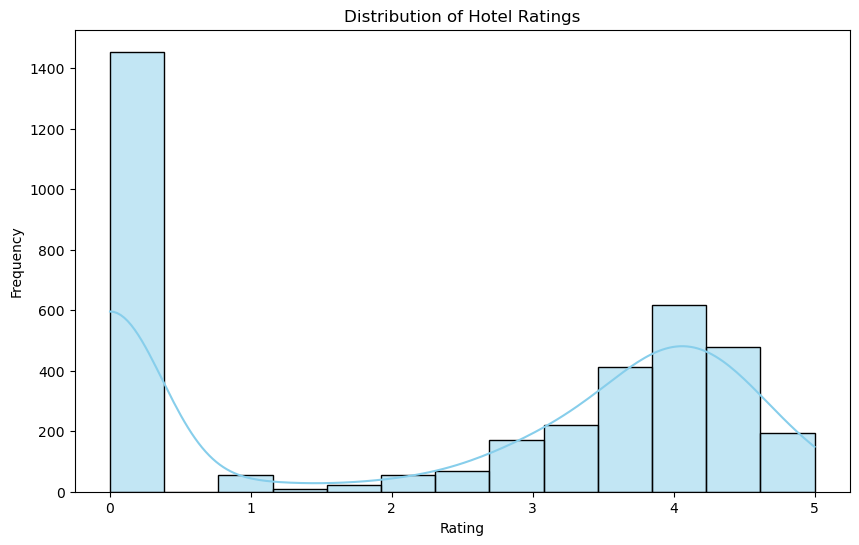

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='rating', kde=True, color='skyblue', edgecolor='black', linewidth=1)
plt.title('Distribution of Hotel Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

The histogram shows the distribution of hotel ratings. 

* **x-axis** represents the rating, which ranges from 0 to 5. 
* **y-axis** represents the frequency, which is the number of hotels that received a particular rating. 

The graph shows that the majority of hotels received a rating of 4 or 5. The distribution is skewed to the right, which means that there are more hotels with higher ratings than with lower ratings.

In [31]:
median_rating = df['rating'].median()
print(f'Median Rating: {median_rating}')

Median Rating: 3.1


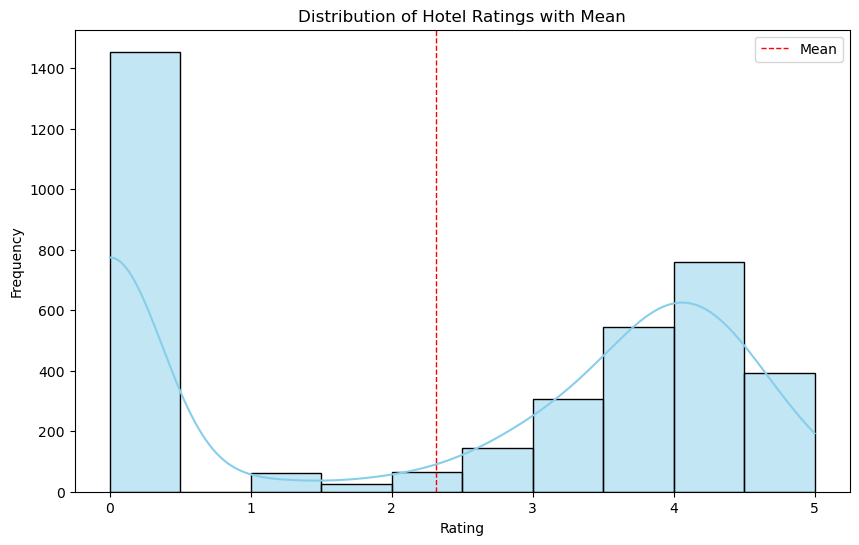

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=10, kde=True, color='skyblue')
plt.axvline(df['rating'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')

plt.title('Distribution of Hotel Ratings with Mean')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()
plt.show()

This is a histogram showing the distribution of hotel ratings.<br>

**X-axis**: Hotel Ratings (ranging from 0 to 5)<br>
**Y-axis**: Frequency (how many hotels have a given rating)<br>
**Shape**: The distribution is skewed to the right, which means most hotels have higher ratings.


##### Guest Recommendation

In [33]:
df['guest_recommendation'] = pd.to_numeric(df['guest_recommendation'], errors='coerce')

In [34]:
inf_ratings = np.isinf(df['guest_recommendation'])
print("Number of infinite values in 'guest_recommendation':", inf_ratings.sum())

Number of infinite values in 'guest_recommendation': 0


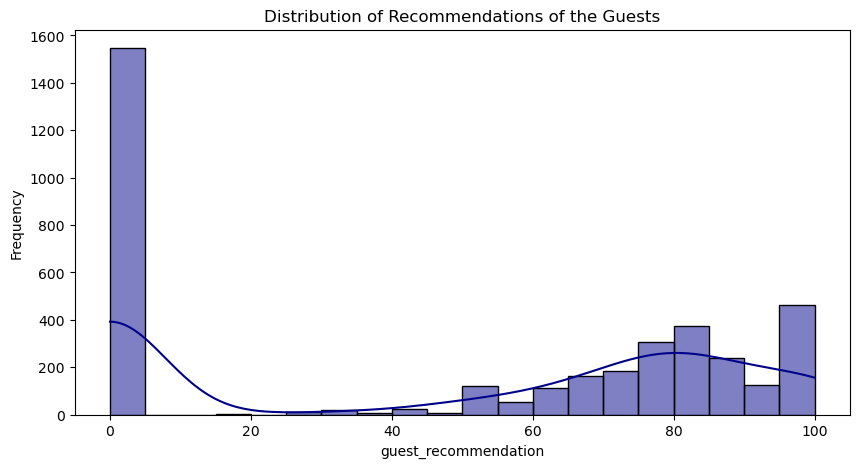

In [35]:
plt.figure(figsize=(10, 5))
sns.histplot(df['guest_recommendation'], kde=True, bins=20, color='darkblue')
plt.title('Distribution of Recommendations of the Guests')
plt.xlabel('guest_recommendation')
plt.ylabel('Frequency')
plt.show()

**Mean Of the 'guest_recommendation'**

In [36]:
mean_rating = df['guest_recommendation'].mean()
print("Mean of Recommendation of the Guests:", mean_rating)

Mean of Recommendation of the Guests: 46.565228966986155


In [37]:
median_rating = df['guest_recommendation'].median()
print(f'Median guest_recommendation: {median_rating}')

Median guest_recommendation: 63.0


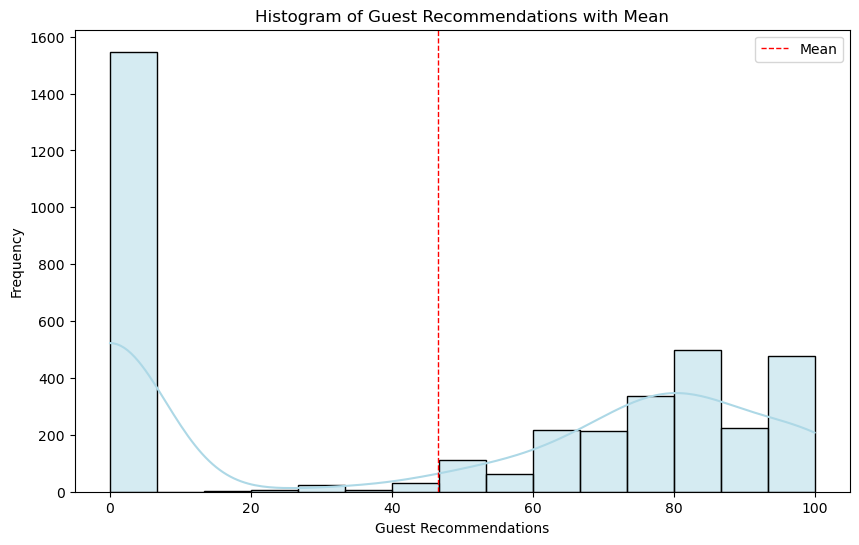

In [38]:
# Calculate the standard deviation of guest recommendations
std_dev_guest_recommendation = df['guest_recommendation'].std()

# Plotting the histogram with standard deviation
plt.figure(figsize=(10, 6))
sns.histplot(df['guest_recommendation'], bins=15, kde=True, color='lightblue')

# Plot mean and standard deviation lines
mean_guest_recommendation = df['guest_recommendation'].mean()
plt.axvline(mean_guest_recommendation, color='red', linestyle='dashed', linewidth=1, label='Mean')

# Add titles and labels
plt.title('Histogram of Guest Recommendations with Mean')
plt.xlabel('Guest Recommendations')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Histogram of Guest Recommendations with Standard Deviation

The histogram presented above visualizes the distribution of guest recommendations across various properties. The x-axis represents the number of guest recommendations, while the y-axis indicates the frequency of these occurrences.

Key features of the graph:
- **Mean (Red Dashed Line):** The red dashed line represents the mean number of guest recommendations. This line serves as a central point around which the data is distributed.
- **Distribution:** The histogram illustrates the concentration of guest recommendations, with most data points clustering around the mean, indicating that the majority of properties receive a similar number of recommendations. However, the distribution also shows how some properties significantly deviate, with either very high or very low numbers of guest recommendations.


## CATEGORICAL DATA 

In [39]:
property_type_counts = df['property_type'].value_counts()


In [40]:
print(property_type_counts)

property_type
Hotel                2175
Resort                491
Guest House           229
Homestay              221
Service Apartment     168
Lodge                 103
Houseboat              72
Cottage                69
Tent                   52
BnB                    47
Villa                  46
Bungalow               43
Palace                 11
Hostel                  9
Motel                   8
Farm Stay               7
Luxury Yacht            3
Beach Hut               2
Name: count, dtype: int64


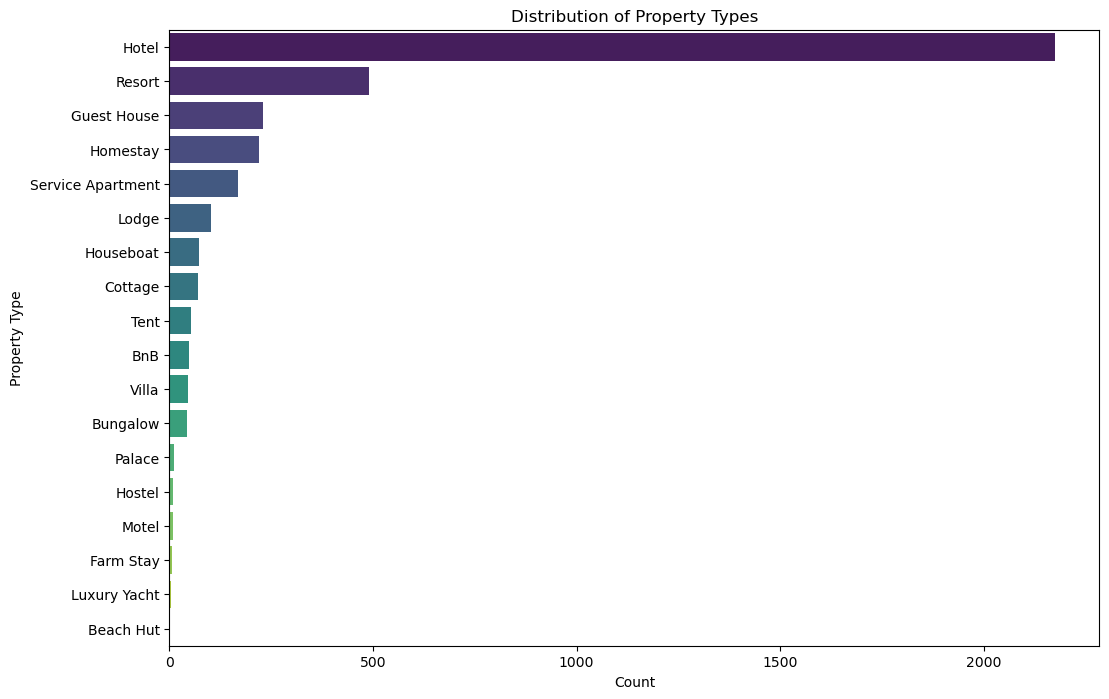

In [41]:
plt.figure(figsize=(12, 8))
sns.barplot(x=property_type_counts.values, y=property_type_counts.index, palette='viridis')
plt.title('Distribution of Property Types')
plt.xlabel('Count')
plt.ylabel('Property Type')
plt.show()

## Best Property of each Type of Property ##

In [42]:
# List of property types we need
property_types = ['Hotel', 'Resort', 'Guest House', 'Homestay', 'Service Apartment']

top_rated_properties = []

# Looping through each property type and find the top-rated one
for property_type in property_types:
    top_property = df[df['property_type'] == property_type].sort_values(by='rating', ascending=False).head(1)
    top_rated_properties.append(top_property)

# Concatenate the top-rated properties into a single DataFrame
top_rated_df = pd.concat(top_rated_properties)

# Display the result
print(top_rated_df[['property_name', 'property_type', 'rating']])


            property_name      property_type  rating
2186   Hotel Radhe Palace              Hotel     5.0
2767     The River Palace             Resort     5.0
2593   The Sana Home Stay        Guest House     5.0
1187  Soudhamini Homestay           Homestay     5.0
2354    The SAI residence  Service Apartment     5.0


In [43]:
room_type_counts = df['room_type'].value_counts()
print(room_type_counts)

room_type
Deluxe Room                659
Standard Room              342
Deluxe                      90
Executive Room              84
Super Deluxe Room           79
                          ... 
Stilt House                  1
Deluxe Room Valley View      1
SuperDeluxe Room             1
Standard Room (Single)       1
Gold Room                    1
Name: count, Length: 1233, dtype: int64


**Top 20 values of Room Type** 
This explains us what type of Rooms are mostly offeredn

In [44]:
df['room_type_normalized'] = df['room_type'].str.lower()

# Map similar room types to a common name
room_type_mapping = {
    'deluxe room': 'deluxe room',
    'deluxe': 'deluxe room',
    'deluxe room ': 'deluxe room',
    'Deluxe Room' : 'deluxe room',
    'DELUXE ROOM' : 'deluxe room',
    'deluxe rooms' : 'deluxe room',
    'delux room': 'deluxe room',
    'deluxe non ac room' : 'deluxe room',
    'deluxe non a/c room': 'deluxe room',
    'deluxe ac room': 'deluxe ac room',
    'deluxe a/c room': 'deluxe ac room',
    'ac deluxe': 'deluxe ac room',
    'ac deluxe room': 'deluxe ac room',
    'super deluxe room': 'super deluxe room',
    'super deluxe': 'super deluxe room',
    'standard room': 'standard room',
    'standard non ac room': 'standard room',
    'standard non a/c room': 'standard room',
    'standard': 'standard room',
    'standard room ': 'standard room',
    'standard rooms': 'standard room',
    'standard  room': 'standard room',
    'standard non ac': 'standard room',
    'standard ac room ': 'standard ac room',
    'standard a/c room' : 'standard ac room',
    'ac room': 'ac room',
    'a/c room': 'ac room',
    'ac rooms': 'ac room',
    'non ac room': 'non ac room',
    'non a/c room': 'non ac room',
    'suite room': 'suite room',
    'luxury room': 'luxury room',
    'executive room': 'executive room',
    'premium room': 'premium room',
    'superior room': 'superior room',
   
}

# Apply the mapping to normalize room types
df['room_type_normalized'] = df['room_type_normalized'].replace(room_type_mapping)

# Recount the occurrences of each normalized room type
normalized_room_type_counts = df['room_type_normalized'].value_counts()

# Get the top 20 normalized room types
top_20_normalized_room_types = normalized_room_type_counts.head(20)
print(top_20_normalized_room_types)

room_type_normalized
deluxe room                   893
standard room                 558
super deluxe room             110
ac room                       105
deluxe ac room                 95
executive room                 93
standard ac room               62
non ac room                    55
superior room                  47
suite room                     38
premium room                   35
luxury room                    29
double room                    26
deluxe double room             17
deluxe room with free wifi     15
executive                      14
deluxe cottage                 14
double bed room                13
single room                    12
cottage room                   11
Name: count, dtype: int64


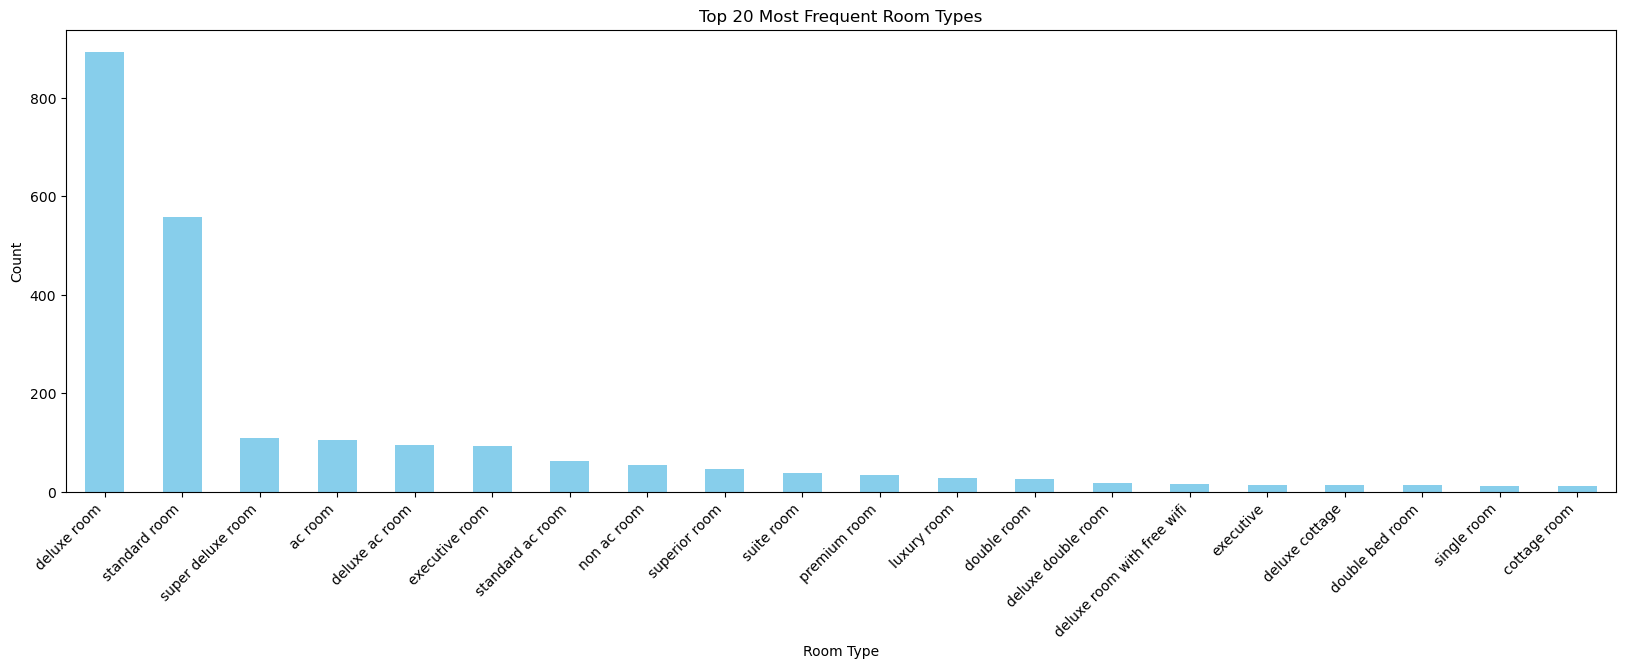

In [45]:
plt.figure(figsize=(20, 6))
top_20_normalized_room_types.plot(kind='bar', color='skyblue')
plt.title('Top 20 Most Frequent Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

### Top 20 Most Frequent Room Types

This bar chart illustrates the frequency distribution of the top 20 most common room types in the dataset. The x-axis represents different room types, while the y-axis shows the count of occurrences for each room type.

**Key Observations:**
- The **Deluxe Room** is the most frequent room type, with a significantly higher count than the others, exceeding 800 occurrences.
- **Standard Room** and **Super Deluxe Room** follow, though their frequencies are much lower compared to the Deluxe Room.
- The remaining room types have much lower frequencies, with counts gradually decreasing, indicating that they are less common in the dataset.

This chart is useful for understanding the distribution of room types and can help identify the most common room categories offered by the properties in the dataset. This insight can be valuable for focusing on the most popular room types in marketing strategies or resource allocation.
).

**Top 20 room types VS Guest Recommendation**
**This graph helps us to identify the trend of Room types which are mostly recommended by the Guests**

In [46]:
# Filter the DataFrame to include only the top 20 normalized room types
top_20_normalized_df = df[df['room_type_normalized'].isin(top_20_normalized_room_types.index)]

# Calculate the mean guest recommendation for each normalized room type
normalized_room_type_recommendation = top_20_normalized_df.groupby('room_type_normalized')['guest_recommendation'].mean().sort_values(ascending=False)

# Print the results
print(normalized_room_type_recommendation)

room_type_normalized
superior room                 69.978723
deluxe room with free wifi    66.133333
deluxe double room            64.764706
premium room                  61.657143
executive room                57.397849
deluxe cottage                56.142857
executive                     52.857143
super deluxe room             52.836364
luxury room                   50.758621
standard ac room              49.177419
deluxe room                   48.466965
single room                   47.250000
deluxe ac room                43.568421
standard room                 39.238351
non ac room                   39.163636
double bed room               38.461538
suite room                    34.526316
cottage room                  33.636364
double room                   33.230769
ac room                       20.609524
Name: guest_recommendation, dtype: float64


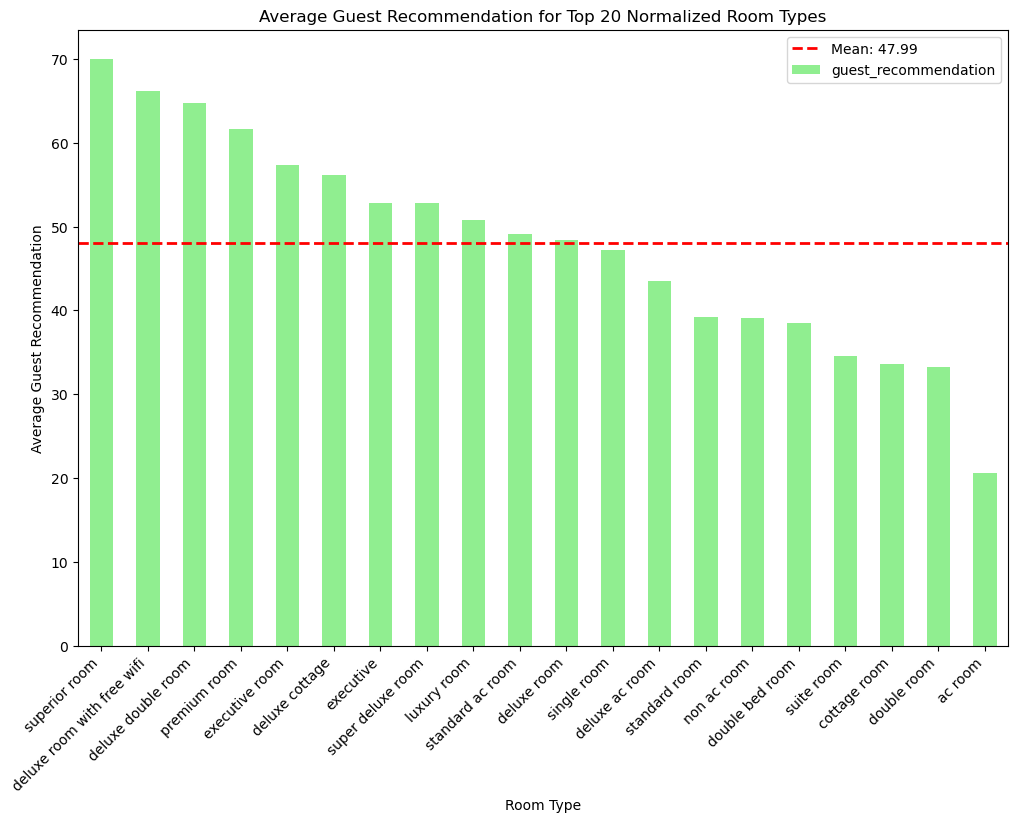

In [47]:
mean_recommendation = normalized_room_type_recommendation.mean()

plt.figure(figsize=(12, 8))
normalized_room_type_recommendation.plot(kind='bar', color='lightgreen')
plt.axhline(mean_recommendation, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_recommendation:.2f}')
plt.title('Average Guest Recommendation for Top 20 Normalized Room Types')
plt.xlabel('Room Type')
plt.ylabel('Average Guest Recommendation')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

### Average Guest Recommendation for Top 20 Normalized Room Types

This bar chart visualizes the average guest recommendation scores for the top 20 room types, normalized across the dataset. Each bar represents the average number of guest recommendations for a specific room type, allowing for a comparative analysis of how different room types are perceived by guests.

A dashed red line is overlaid on the chart to indicate the overall mean guest recommendation across all room types. This line serves as a reference point, highlighting which room types perform above or below the average.

**Key Points:**
- The x-axis represents the different room types, while the y-axis indicates the average guest recommendation.
- The chart makes it easier to identify which room types are most frequently recommended by guests.
- The inclusion of the mean recommendation line helps to quickly assess how each room type compares to the average guest recommendation score.

This analysis is particularly useful for understanding guest preferences and can help in making data-driven decisions regarding room offerings and marketing strategies.
data.

##### DISTRIBUTION OF STATE

In [48]:
state_type_counts = df['state'].value_counts()

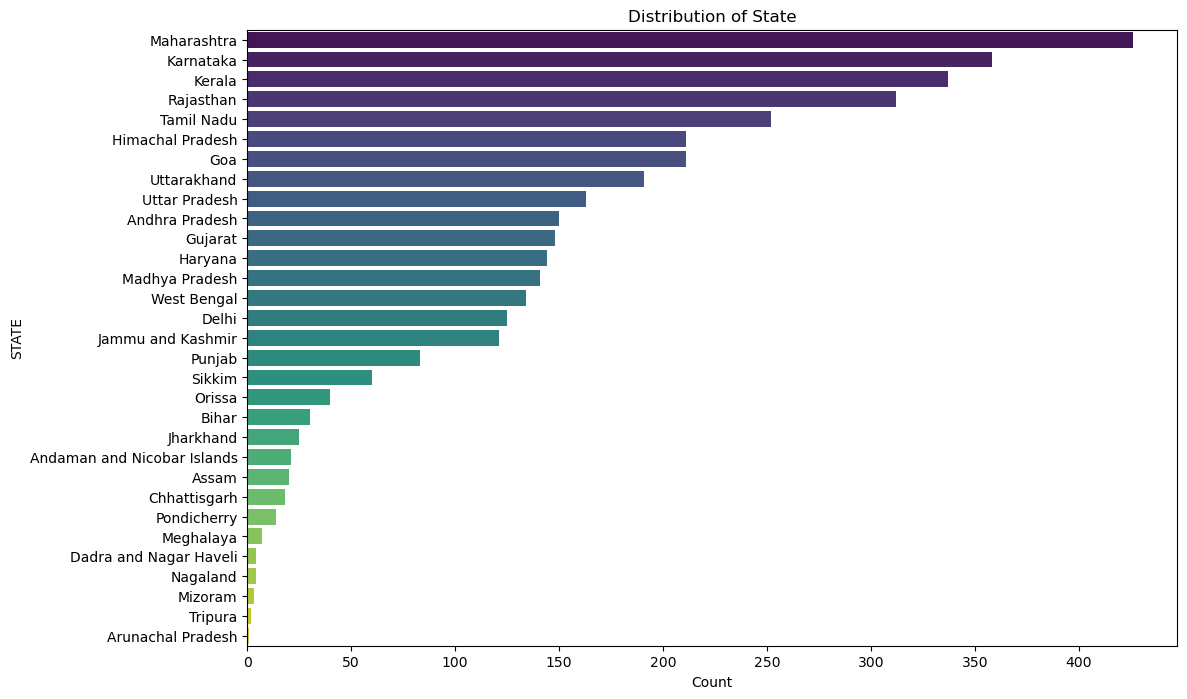

In [49]:
plt.figure(figsize=(12, 8))
sns.barplot(x=state_type_counts.values, y=state_type_counts.index, palette='viridis')
plt.title('Distribution of State')
plt.xlabel('Count')
plt.ylabel('STATE')
plt.show()

##### CORRELATION ANALYSIS

In [50]:
numerical_features = df[['hotel_star_rating',  'rating', 
                         'site_review_count', 'guest_recommendation', 
                        ]]

corr_matrix = numerical_features.corr()

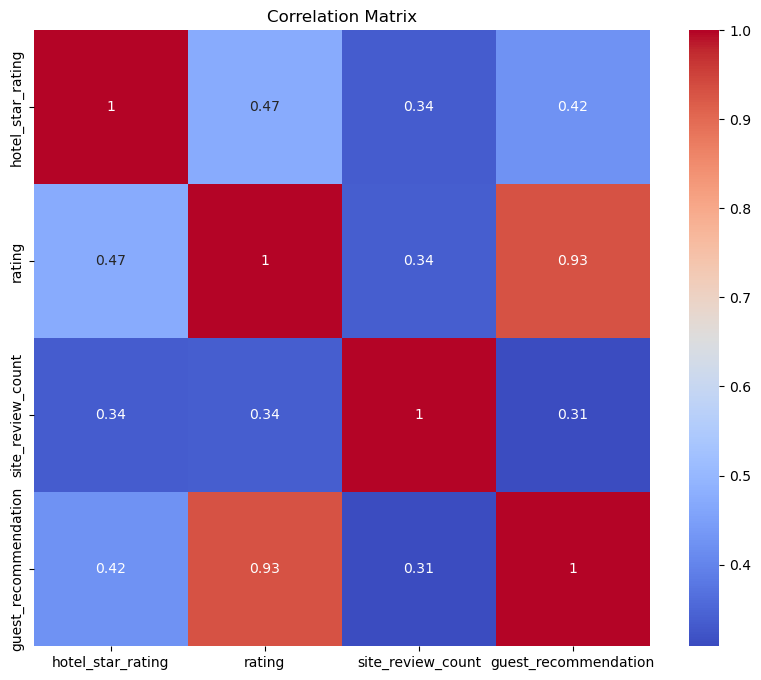

In [51]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

The correlation matrix shows that the strongest positive correlation is between guest recommendation and rating (0.93). <br>
<br>
**This suggests that hotels with higher ratings are more likely to receive guest recommendations.** <br>
<br>
site_review_count and rating are also positively correlated, meaning that **hotels with more reviews tend to have higher ratings**. <br>
There are also **moderate positive correlations between hotel_star_rating and rating, and between hotel_star_rating and guest_recommendation.**

# FEATURE ANALYSIS
involves examining and understanding the characteristics of individual features in a dataset.

##### FEATURE ANALYSIS FOR ROOMS, ROOM TYPES, and various AMMENITIES 

In [52]:
# word count analysis
def word_count_analysis(column):
    avg_word_count = column.apply(lambda x: len(x.split())).mean()
    top_10_words = column.apply(lambda x: x.split()).explode().value_counts().head(10)
    return avg_word_count, top_10_words


In [53]:
# apply word count analysis to textual columns
textual_columns = ['property_name', 'room_type', 'room_facilities', 'hotel_facilities']

for column in textual_columns:
    avg_word_count, top_10_words = word_count_analysis(df[column])
    print(f"Average word count in {column}: {avg_word_count:.2f}")
    print(f"Top 10 most frequent words in {column}: {top_10_words}")
    print()


Average word count in property_name: 3.00
Top 10 most frequent words in property_name: property_name
Hotel        1101
The           277
Resort        270
Inn           199
Residency     184
House         165
Palace        153
Guest         139
HOTEL          90
Treebo         88
Name: count, dtype: int64

Average word count in room_type: 2.48
Top 10 most frequent words in room_type: room_type
Room         2324
Deluxe       1398
Standard      698
AC            430
Non           303
Double        229
room          198
Executive     187
A/C           187
ROOM          159
Name: count, dtype: int64

Average word count in room_facilities: 26.65
Top 10 most frequent words in room_facilities: room_facilities
/            10130
Room          3794
Bathroom      3278
Service       2848
TV            2538
Satellite     2537
Running       1964
Cold          1964
Hot           1964
(on           1883
Name: count, dtype: int64

Average word count in hotel_facilities: 36.19
Top 10 most frequent word

In [54]:
# creating new features based on word count analysis

df['property_name_word_count'] = df['property_name'].apply(lambda x: len(x.split()))
df['room_type_word_count'] = df['room_type'].apply(lambda x: len(x.split()))
df['room_facilities_word_count'] = df['room_facilities'].apply(lambda x: len(x.split()))
df['hotel_facilities_word_count'] = df['hotel_facilities'].apply(lambda x: len(x.split()))



In [55]:
def extract_word(column, word):
    return column.apply(lambda x: 1 if word in x.lower() else 0)

# Extracting features for each facility in the top 10 list  for hotel_facilities

df['has_parking'] = extract_word(df['hotel_facilities'], 'parking')
df['has_24_hour_front_desk'] = extract_word(df['hotel_facilities'], 'front desk')
df['has_room_service'] = extract_word(df['hotel_facilities'], 'room service')
df['has_air_conditioning'] = extract_word(df['hotel_facilities'], 'ac')
df['has_fitness_center'] = extract_word(df['hotel_facilities'], 'gym')
df['has_restaurant'] = extract_word(df['hotel_facilities'], 'restaurant')
df['has_swimming_pool'] = extract_word(df['hotel_facilities'], 'swimming pool')
df['has_bar_lounge'] = extract_word(df['hotel_facilities'], 'bar')
df['has_laundry_service'] = extract_word(df['hotel_facilities'], 'laundry service')
df['has_free_wifi'] = extract_word(df['hotel_facilities'], 'internet')

# Printing the word counts for each facility
print("Word counts for hotel facilities :")
print("Free Wi-Fi:", df['has_free_wifi'].sum())
print("Parking:", df['has_parking'].sum())
print("24-Hour Front Desk:", df['has_24_hour_front_desk'].sum())
print("Room Service:", df['has_room_service'].sum())
print("Air Conditioning:", df['has_air_conditioning'].sum())
print("Fitness Center:", df['has_fitness_center'].sum())
print("Restaurant:", df['has_restaurant'].sum())
print("Swimming Pool:", df['has_swimming_pool'].sum())
print("Bar/Lounge:", df['has_bar_lounge'].sum())
print("Laundry Service:", df['has_laundry_service'].sum())




Word counts for hotel facilities :
Free Wi-Fi: 1846
Parking: 3040
24-Hour Front Desk: 3030
Room Service: 2628
Air Conditioning: 3396
Fitness Center: 387
Restaurant: 1590
Swimming Pool: 442
Bar/Lounge: 608
Laundry Service: 2136


In [56]:
def extract_room_type(column, room_type):
    return column.apply(lambda x: 1 if room_type in x.lower() else 0)
##Extracting features for room_type

df['has_delux_room'] = extract_room_type(df['room_type'], 'delux')
df['has_standard_room'] = extract_room_type(df['room_type'], 'standard')
df['has_executive_room'] = extract_room_type(df['room_type'], 'executive')
df['has_double_room'] = extract_room_type(df['room_type'], 'double room')
df['has_suite'] = extract_room_type(df['room_type'], 'suite')

##Printing the word counts for each room type
print("Room Type counts:")
print("Delux Room:", df['has_delux_room'].sum())
print("Standard Room:", df['has_standard_room'].sum())
print("Executive Room:", df['has_executive_room'].sum())
print("Double Room:", df['has_double_room'].sum())
print("Suite:", df['has_suite'].sum())


Room Type counts:
Delux Room: 1553
Standard Room: 787
Executive Room: 206
Double Room: 80
Suite: 113


In [57]:
def extract_facility(column, facility_type):
    return column.apply(lambda x: 1 if facility_type in x.lower() else 0)

# Extracting features for each facility in the list
df['has_bathroom'] = extract_facility(df['room_facilities'], 'bathroom')
df['has_tv'] = extract_facility(df['room_facilities'], 'tv')
df['has_ac'] = extract_facility(df['room_facilities'], 'ac')
df['has_amenities'] = extract_facility(df['room_facilities'], 'amenities')

# Printing the counts for each facility type
print("Room Facility counts:")
print("Bathroom:", df['has_bathroom'].sum())
print("TV:", df['has_tv'].sum())
print("AC:", df['has_ac'].sum())
print("Amenities:", df['has_amenities'].sum())



Room Facility counts:
Bathroom: 3036
TV: 2581
AC: 2381
Amenities: 2356


##### WORD CLOUD FOR PROPERTY TYPE

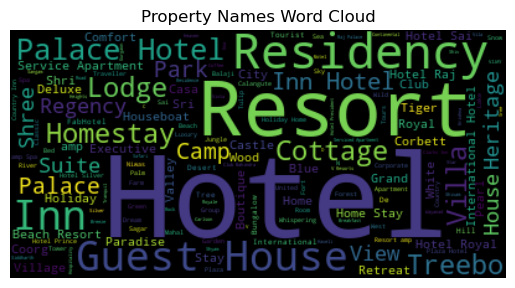

In [58]:
wordcloud = WordCloud().generate(' '.join(df['property_name'].tolist()))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Property Names Word Cloud')
plt.show()

from this we can say, that most of the property are **hotels** and **resorts**

##### HEATMAP

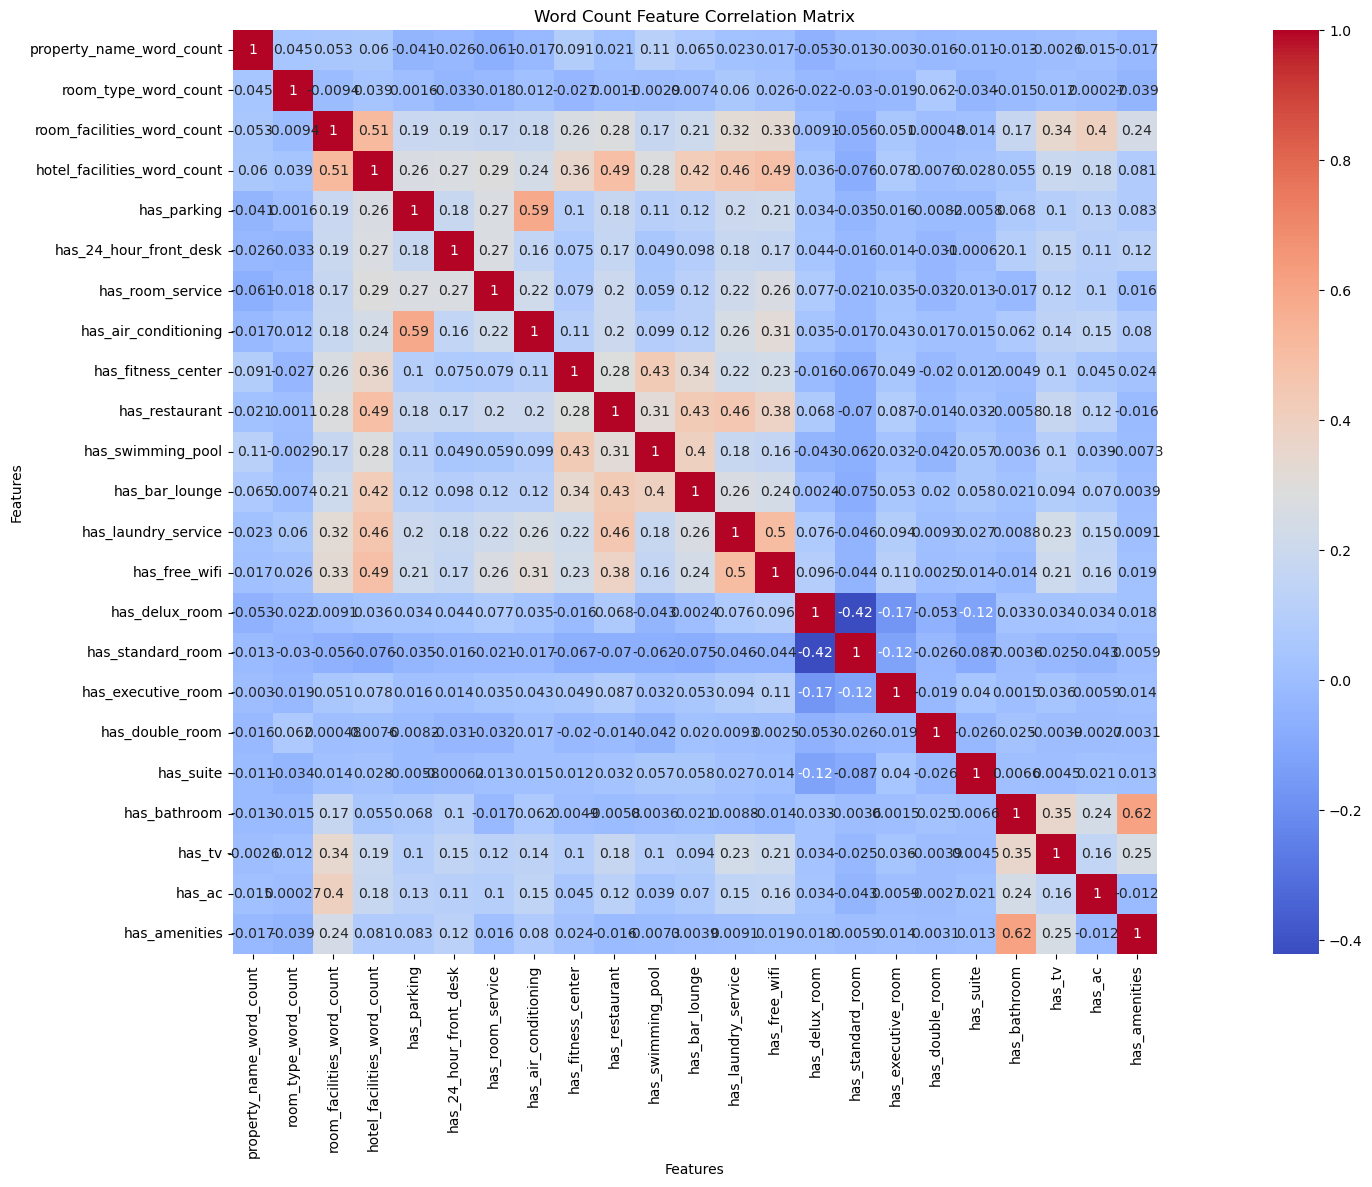

In [59]:
word_count_features = [
    'property_name_word_count',
    'room_type_word_count',
    'room_facilities_word_count',
    'hotel_facilities_word_count',
    'has_parking',
    'has_24_hour_front_desk',
    'has_room_service',
    'has_air_conditioning',
    'has_fitness_center',
    'has_restaurant',
    'has_swimming_pool',
    'has_bar_lounge',
    'has_laundry_service',
    'has_free_wifi',
    'has_delux_room',
    'has_standard_room',
    'has_executive_room',
    'has_double_room',
    'has_suite',
    'has_bathroom',
    'has_tv',
    'has_ac',
    'has_amenities'
]

# Create a correlation matrix
corr_matrix = df[word_count_features].corr()

# Create a heatmap
plt.figure(figsize=(30, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Word Count Feature Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

Positive Correlations:

**Room Facilities & Hotel Facilities**: A strong positive correlation indicates that hotels describing a lot of room facilities also tend to list many hotel facilities (e.g., pools, restaurants). This makes intuitive sense as larger hotels often have more amenities.<br>
**Parking & Front Desk**: Hotels with parking often have a 24-hour front desk, potentially suggesting a focus on convenience and service.<br>
**Swimming Pool & Bar Lounge**: A high correlation suggests that hotels with swimming pools often have a bar lounge, implying a focus on leisure and relaxation.<br>
**Deluxe Rooms & Free WiFi**: Hotels offering deluxe rooms are often associated with free WiFi, suggesting a premium experience and modern amenities.<br>
**Bathroom & TV**: The presence of a bathroom is strongly linked to the mention of a TV, suggesting that these are standard features in most hotel rooms. <br>
similarly <br>
**Amenities & TV**: Hotels describing numerous amenities (e.g., pools, restaurants) also frequently mention TVs, perhaps suggesting a broader focus on entertainment.


##### FEATURE ANALYSIS FOR REVIEWS, REVIEW COUNT and HOTEL

In [60]:
# Split the 'review_count_by_category' column into three separate columns
df[['positive_reviews', 'critical_reviews', 'reviews_with_images']] = df['review_count_by_category'].str.split('|', expand=True)

# Function to clean and convert the values to integers
def clean_and_convert(value, prefix):
    try:
        # Remove the prefix and convert to integer
        return int(value.replace(prefix, '').strip())
    except ValueError:
        # If conversion fails, return 0 (or you can choose another default)
        return 0

# Apply the cleaning and conversion function to each column
df['positive_reviews'] = df['positive_reviews'].apply(clean_and_convert, prefix='positive reviews::')
df['critical_reviews'] = df['critical_reviews'].apply(clean_and_convert, prefix='critical reviews::')
df['reviews_with_images'] = df['reviews_with_images'].apply(clean_and_convert, prefix='reviews with images::')

# Display the updated dataframe
df[['positive_reviews', 'critical_reviews', 'reviews_with_images']].head()



,positive_reviews,critical_reviews,reviews_with_images
0,74,13,13
1,8,0,2
2,1,1,1
3,1,0,0
4,56,65,17


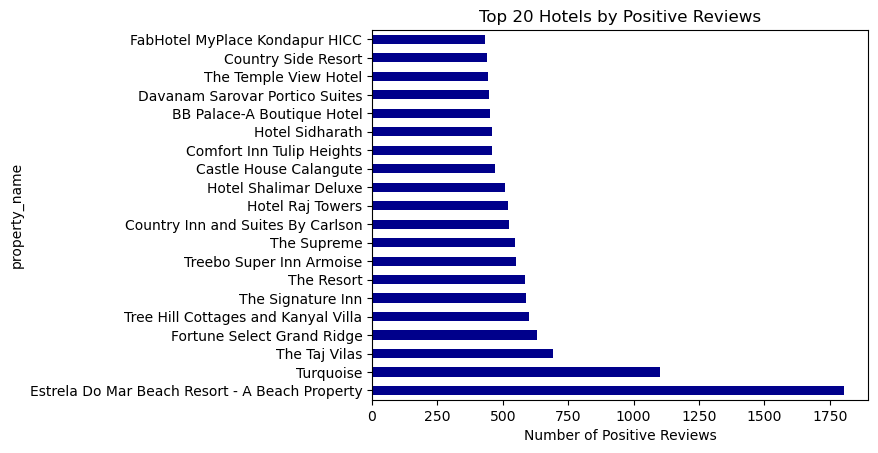

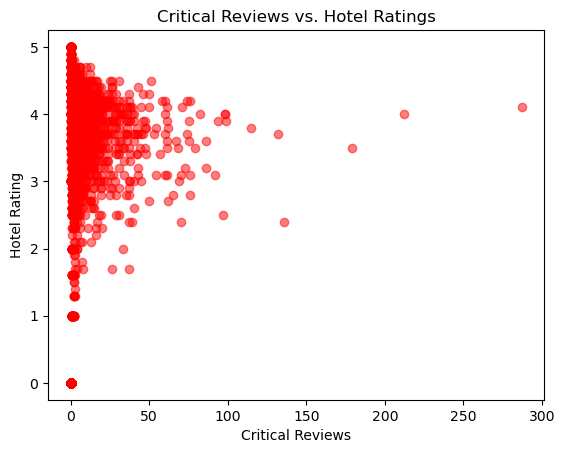

In [61]:
# Top 10 hotels by positive reviews
top_hotels = df.nlargest(20, 'positive_reviews')[['property_name', 'positive_reviews']]

# Plot the top 10 hotels by positive reviews
top_hotels.set_index('property_name').plot(kind='barh', color='darkblue', legend=False)
plt.title('Top 20 Hotels by Positive Reviews')
plt.xlabel('Number of Positive Reviews')
plt.show()

# Analyze critical review impact on ratings
plt.scatter(df['critical_reviews'], df['rating'], color='red', alpha=0.5)
plt.title('Critical Reviews vs. Hotel Ratings')
plt.xlabel('Critical Reviews')
plt.ylabel('Hotel Rating')
plt.show()


The first chart shows the **top 20 hotels by positive reviews**.<br>
The hotel "Estrela Do Mar Beach Resort - A Beach Property" has the most positive reviews, with over 1800 reviews. <br>
<br>
The second chart shows the **relationship between critical reviews and hotel ratings**. 1<br>
The chart indicates that hotels with more critical reviews generally have lower ratings. 

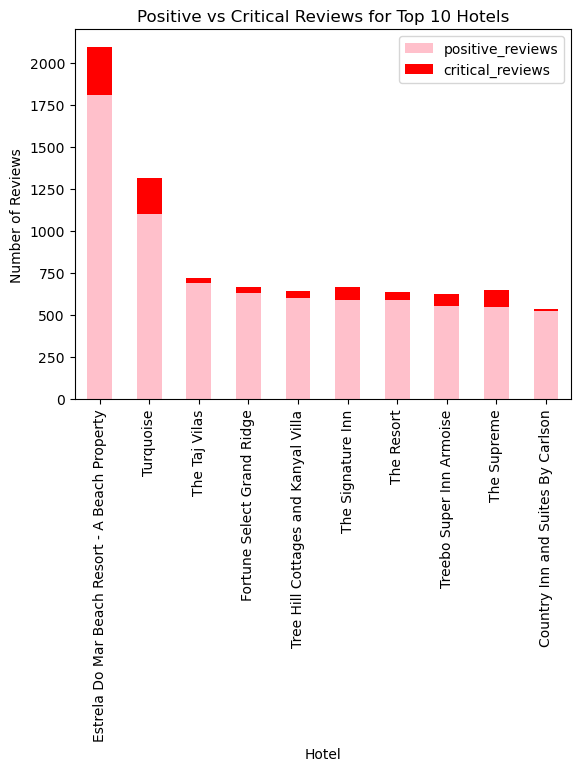

In [62]:
# Stacked bar chart to visualize positive vs critical reviews across top 10 hotels
df_sorted = df.sort_values('positive_reviews', ascending=False).head(10)

# Using property_name as the index for better labeling
df_sorted.set_index('property_name')[['positive_reviews', 'critical_reviews']].plot(kind='bar', stacked=True, color=['pink', 'red'])
plt.title('Positive vs Critical Reviews for Top 10 Hotels')
plt.xlabel('Hotel')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=90)
plt.show()


The bar chart shows the number of positive and critical reviews for the top 10 hotels.

The green bars represent the number of positive reviews.
The red bars represent the number of critical reviews.
We can see that hotel 763 has the highest number of both positive and critical reviews. The number of positive reviews for hotel 763 is much higher than the number of critical reviews.

This suggests that hotel 763 is a popular choice among guests, with many positive reviews. 

# VISUALISATIONS

## GEOGRAPHICAL SCATTER POINT

In [63]:
# Create a Folium map
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=10)

# Add markers to the map, colored by rating
for index, row in df.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']], 
                        radius=3, 
                        color='blue' if row['rating'] > 4 else 'red',
                        popup=f"Hotel: {row['property_name']}\nRating: {row['rating']}").add_to(m)


In [64]:
m.save('hotel_map.html')

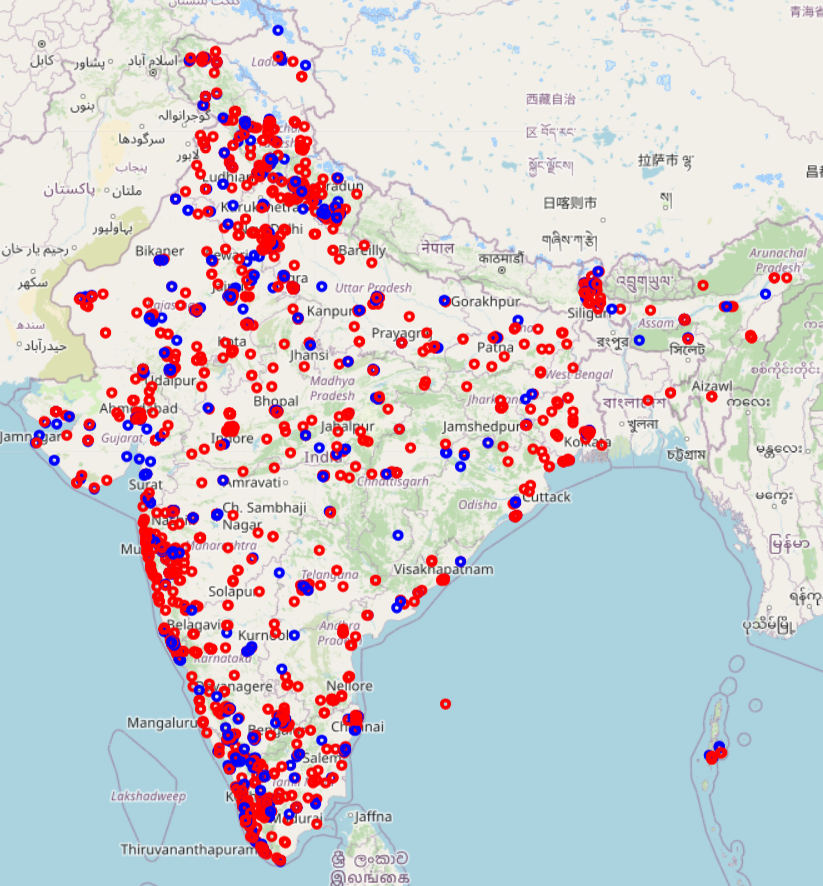

The blue marks are those hotels whose ratings are **above 4**

<br>
<br>
<br>

# MACHINE LEARNING PART

## IMPORTING MODULES ##
*necessary modules

In [65]:
#importing required libraries 
import pandas as pd   # For data manipulation and analysis
from sklearn.feature_extraction.text import CountVectorizer # For converting text data into numerical data
from sklearn.preprocessing import StandardScaler # For feature scaling
from sklearn.model_selection import train_test_split   # For splitting the data into training and testing sets
from sklearn.svm import SVR # Support Vector Regressor for regression tasks
from sklearn.linear_model import LinearRegression# Linear Regression model
from sklearn.naive_bayes import GaussianNB # Naive Bayes classifier
from sklearn.ensemble import RandomForestRegressor# Random Forest Regressor
from sklearn.metrics import mean_squared_error, accuracy_score# For evaluating model performance
import numpy as np# For numerical operations


# Load the dataset containing hotel customer feedback and other relevant features.
file_path = 'Hotel_Goibibo_NoNull.csv'  # Update the file path as needed
df = pd.read_csv(file_path) # Read the CSV file into a pandas DataFrame
# The dataset is now loaded into a DataFrame named 'df'. 
# The next steps would typically involve data preprocessing, feature extraction, model training, and evaluation.




In [66]:
print(df.head())
print(df.info())

         property_name             state     city            area  \
0     Baragarh Regency  Himachal Pradesh   Manali          Others   
1  Asian Suites A- 585           Haryana  Gurgaon     Sushant Lok   
2        Bevvan Resort               Goa      Goa  Calangute Area   
3    Apple Inn Cottage  Himachal Pradesh   Manali   Village Simsa   
4  Anmol Hotel Pvt.Ltd             Delhi    Delhi       Paharganj   

                                             address  hotel_star_rating  \
0  15th Mile, N.H.21,Manali, District Kullu,Himac...                  2   
1  A-585, Sushant Lok-1 ,Near Iffco Chowk Metro S...                  0   
2  Cobra Vaddo,Calungate Baga Road, Bardez, Calan...                  0   
3                                              Simsa                  2   
4         8180 Street No.-6,Arakashan Road,Paharganj                  2   

  property_type hotel_brand  \
0        Resort    no brand   
1   Guest House    no brand   
2        Resort    no brand   
3       Co

##  Data Preprocessing ## 
Splitting 'review_count_by_category' Column into Separate Columns

*The 'review_count_by_category' column contains review data in a single string, 
 where different categories of reviews (positive, critical, neutral) are separated by a '|'. 
We need to split this data into separate columns for better analysis. *

In [67]:
# Preprocessing
# Split 'review_count_by_category' into separate columns
review_categories = df['review_count_by_category'].str.split('|', expand=True)# Split the 'review_count_by_category' column into three new columns: 'positive_reviews', 'critical_reviews', and 'neutral_reviews'.
review_categories.columns = ['positive_reviews', 'critical_reviews', 'neutral_reviews']# Rename the columns to reflect the type of reviews they contain.

# At this point, 'review_categories' is a DataFrame with three new columns. 

##  Extracting Numeric Values from Review Categories

*The 'positive_reviews', 'critical_reviews', and 'neutral_reviews' columns contain text data. 
We need to extract the numeric values (review counts) from these columns for further analysis.*


In [68]:
# Extract numeric values from review categories
for column in review_categories.columns:# Loop through each column in the 'review_categories' DataFrame.
    review_categories[column] = review_categories[column].str.extract('(\d+)').astype(float)# Use a regular expression to extract numeric values from the text and convert them to float.

    # After this step, the 'review_categories' DataFrame will contain only numeric values, 
# representing the counts of positive, critical, and neutral reviews for each hotel.


## Combining Extracted Columns Back into the Main Dataset ## 

*Now that we have extracted the numeric values from the review categories,the next step is to merge these new columns back into the main DataFrame.*

In [69]:
# Combine the extracted columns back into the main dataset
df = pd.concat([df, review_categories], axis=1)# Concatenate the original DataFrame ('df') with the 'review_categories' DataFrame along the columns (axis=1).
df.drop(columns=['review_count_by_category'], inplace=True)# Drop the original 'review_count_by_category' column since its data is now represented in the new columns.


# At this stage, the main DataFrame 'df' has been updated with three new columns: 
# 'positive_reviews', 'critical_reviews', and 'neutral_reviews'. 
# The original 'review_count_by_category' column has been removed.


##  Vectorization of Hotel and Room Facilities ## 

*In this step, we will use separate `CountVectorizer` instances to convert the textual data 
related to hotel and room facilities into numerical form. This is necessary for machine learning models, 
which require numerical input. 
Selecting the features that will be used to train the machine learning models.

In [70]:
# Using separate vectorizers for hotel and room facilities
hotel_vectorizer = CountVectorizer() # Create a CountVectorizer for hotel facilities.
room_vectorizer = CountVectorizer()# Create a separate CountVectorizer for room facilities.
# These vectorizers will transform the text data into vectors of word counts, 
# allowing us to capture the presence of various facilities as features for our model.



##  One-Hot Encoding of Hotel and Room Facilities##  

*We will now transform the text data in the 'hotel_facilities' and 'room_facilities' columns 
into one-hot encoded matrices. One-hot encoding is a method where each unique facility is 
represented as a binary feature (0 or 1) indicating its presence.
* Encoding categorical features into numerical values using LabelEncoder.
* This is necessary because most machine learning models require numerical input.


In [71]:
# Transform hotel and room facilities into one-hot encoded matrices
hotel_facilities_matrix = hotel_vectorizer.fit_transform(df['hotel_facilities'])# Transform the 'hotel_facilities' column into a one-hot encoded matrix using the hotel vectorizer.
room_facilities_matrix = room_vectorizer.fit_transform(df['room_facilities'])# Transform the 'room_facilities' column into a one-hot encoded matrix using the room vectorizer.


# The resulting matrices, 'hotel_facilities_matrix' and 'room_facilities_matrix', 
# are sparse matrices where each row corresponds to a hotel and each column corresponds to a unique facility. 
# A value of 1 in the matrix indicates that the hotel has the corresponding facility.

## Creating DataFrames for Hotel and Room Facilities ##  

*After transforming the facilities into one-hot encoded matrices, the next step is to convert these matrices 
into DataFrames. This will make it easier to work with the data, as each facility will be represented by a 
column with the corresponding binary values. 
* Splitting the dataset into training and testing sets for model evaluation.
* 80% of the data is used for training, and 20% is reserved for testing..


In [72]:
# Create DataFrames for the facilities
hotel_facilities_df = pd.DataFrame(hotel_facilities_matrix.toarray(), columns=hotel_vectorizer.get_feature_names_out())# Convert the hotel facilities matrix into a DataFrame.
# Each column in this DataFrame represents a unique hotel facility, and each row corresponds to a hotel.
room_facilities_df = pd.DataFrame(room_facilities_matrix.toarray(), columns=room_vectorizer.get_feature_names_out())# Convert the room facilities matrix into a DataFrame.
# Each column in this DataFrame represents a unique room facility, and each row corresponds to a hotel room.

# These DataFrames now provide a clear, tabular representation of the facilities, 
# where each feature (facility) is a separate column that can be easily integrated into the main dataset.

## Adding Prefixes to Avoid Column Name Conflicts ##  
When combining these new facility DataFrames with the main dataset, 
it's essential to ensure that there are no column name conflicts.
We can avoid potential conflicts by adding unique prefixes to the column names in each DataFrame.

In [73]:
# Add prefixes to avoid column name conflicts
hotel_facilities_df = hotel_facilities_df.add_prefix('hotel_facility_')# Add the prefix 'hotel_facility_' to each column name in the hotel facilities DataFrame.
room_facilities_df = room_facilities_df.add_prefix('room_facility_')# Add the prefix 'room_facility_' to each column name in the room facilities DataFrame.

# By adding these prefixes, we ensure that all column names are unique, 
# which helps prevent issues when merging these DataFrames with the main dataset.

In [74]:
# Combine facilities data with the main dataset
# ### Combining Facilities Data with the Main Dataset

# Now that we have the one-hot encoded DataFrames for hotel and room facilities, 
# the next step is to combine these DataFrames with the main dataset (`df`).

# Concatenate the original DataFrame (`df`) with the `hotel_facilities_df` and `room_facilities_df` DataFrames.
# This operation adds the facility-related features to the main dataset.
df = pd.concat([df, hotel_facilities_df, room_facilities_df], axis=1)


## Selecting Relevant Features for the Model  ##  

*In this step, we define the set of features that will be used for training the machine learning model.
Features are the columns in the dataset that the model will use to make predictions.

In [75]:
# Selecting relevant features for the model
features = ['rating', 'guest_recommendation', 'positive_reviews', 'critical_reviews', 'neutral_reviews']# Start with a list of basic features that are considered relevant for the model.
features.extend(hotel_facilities_df.columns)# Add the columns from the `hotel_facilities_df` DataFrame to the features list.
# These columns represent one-hot encoded hotel facilities.

# Add the columns from the `room_facilities_df` DataFrame to the features list.
# These columns represent one-hot encoded room facilities.
features.extend(room_facilities_df.columns)

# The `features` list now includes both the original features and the newly created facility features.
# This comprehensive list will be used to train the model and make predictions.


## Defining Features and Target Variable ##

*In this step, we prepare the features and target variable that will be used to train the machine learning model.*
#`X` will be our feature matrix containing all the relevant input data.
#`y` will be our target variable that we want to predict.



In [76]:
X = df[features]# Select the columns specified in the `features` list to create the feature matrix `X`.
# This matrix will be used as input data for the model.
y = df['rating'] # Set the target variable `y` to be the 'rating' column from the dataset.
# The goal is to predict the rating, which is used as a proxy for hotel recommendation

# At this point:
# - `X` contains all the features including review counts and one-hot encoded facility data.
# - `y` contains the ratings, which the model will learn to predict based on the features in `X`.

## Splitting the Data into Training and Testing Sets ##

*To evaluate the performance of our model, we need to split the dataset into training and testing sets.
The training set will be used to train the model.
The testing set will be used to assess the model's performance on unseen data.

In [77]:
# Splitting the data into training and testing sets
# Use the `train_test_split` function to split the feature matrix `X` and target variable `y`.
# - `test_size=0.2` specifies that 20% of the data will be reserved for testing.
# - `random_state=42` ensures reproducibility of the split by setting a seed for random number generation.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Aligning Training and Testing Feature Matrices ##

* After splitting the data, we need to ensure that the training and testing feature matrices have the same columns.
* This is important because the model should have consistent feature inputs during both training and testing.

In [78]:

# Align the columns of `X_train` and `X_test` to ensure they match.
# - `join='left'` ensures that the columns in `X_train` are preserved, and `X_test` is aligned to these columns.
# - `fill_value=0` fills any missing columns in `X_test` with zeros.
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

## Scaling the Feature Matrices ##

* Scaling is an important preprocessing step to ensure that features are on the same scale. 
* This can improve the performance and convergence speed of many machine learning algorithms.


In [79]:
# Create an instance of `StandardScaler`, which standardizes features by removing the mean and scaling to unit variance.
scaler = StandardScaler()
# Fit the scaler on the training data and transform the training features.
# This calculates the mean and standard deviation from `X_train` and scales `X_train` accordingly.
X_train = scaler.fit_transform(X_train)
# Transform the testing features using the same scaler.
# This ensures that `X_test` is scaled using the mean and standard deviation computed from `X_train`, maintaining consistency.
X_test = scaler.transform(X_test)

## Training Machine Learning Models ##
<br>
Training several machine learning models on the training data.<br>
Algorithms used : <br>


**Model 1: Support Vector Machine (SVM)**:The Support Vector Machine (SVM) is a powerful regression technique used for prediction tasks. In this case, we use the SVM with a linear kernel to predict hotel ratings. 
<br>
<br>
**Linear Regression (LR)**: its simple, interpretable model that's easy to implement and computationally efficient. Linear Regression is a fundamental regression technique used to model the relationship between features and the target variable.
In this case, it will be used to predict hotel ratings based on the provided features.
<br>
<br>
**Naive Bayes(NB)**:  Naive Bayes is generally used for classification tasks rather than regression.
For completeness, we will adapt it for binary classification by converting the rating into a binary outcome.
We will classify ratings as above or below the mean rating.
<br>
<br>
**Random Forest (RF)**:  Random Forest is an ensemble learning method that combines multiple decision trees to improve prediction accuracy and robustness.It is particularly effective for regression tasks and can handle complex relationships between features and the target variable.

In [80]:
# Model 1: Support Vector Machine (SVM)
svm_model = SVR(kernel='linear')# Create an instance of the `SVR` (Support Vector Regression) model with a linear kernel.
svm_model.fit(X_train, y_train)# Train (fit) the SVM model using the training data.
# This step involves finding the optimal hyperplane that best separates the data points.
svm_predictions = svm_model.predict(X_test)# Use the trained SVM model to make predictions on the test data.
svm_rmse = np.sqrt(mean_squared_error(y_test, svm_predictions))# Evaluate the performance of the SVM model by calculating the Root Mean Squared Error (RMSE).
# RMSE is a common metric for regression tasks that measures the average magnitude of prediction errors.

#`svm_model` is trained and used to make predictions.
# - `svm_rmse` represents the model's performance, indicating how well the SVM model predicts the ratings.


In [81]:

# Model 2: Linear Regression
lr_model = LinearRegression()
# Create an instance of the `LinearRegression` model.
lr_model.fit(X_train, y_train)# Train (fit) the Linear Regression model using the training data.
# This involves finding the best-fitting linear relationship between the features and the target variable.
lr_predictions = lr_model.predict(X_test)# Use the trained Linear Regression model to make predictions on the test data.
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))# Evaluate the performance of the Linear Regression model by calculating the Root Mean Squared Error (RMSE).
# RMSE measures the average magnitude of prediction errors, providing an indication of how well the model predicts the ratings.

In [82]:
# Model 3: Naive Bayes
# Note: Naive Bayes is not typically used for regression, but let's include it for completeness
nb_model = GaussianNB()# Create an instance of the `GaussianNB` (Naive Bayes) model.
nb_model.fit(X_train, y_train > y_train.mean())  # Binary classification
nb_predictions = nb_model.predict(X_test)# Transform the target variable `y_train` into a binary classification problem.
# Ratings greater than the mean rating are labeled as 1 (positive), and others as 0 (negative).
nb_accuracy = accuracy_score(y_test > y_test.mean(), nb_predictions)# Use the trained Naive Bayes model to make predictions on the test data

In [83]:
# Model 4: Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)# Create an instance of the `RandomForestRegressor` model with 100 trees (n_estimators) and a fixed random seed for reproducibility.
rf_model.fit(X_train, y_train)# Train (fit) the Random Forest model using the training data.
# The model learns from multiple decision trees, each trained on a different subset of the data.
rf_predictions = rf_model.predict(X_test)# Use the trained Random Forest model to make predictions on the test data.
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))# Evaluate the performance of the Random Forest model by calculating the Root Mean Squared Error (RMSE).
# RMSE measures the average magnitude of prediction errors and indicates how well the model predicts the ratings.


In [84]:
# Recommendation: Predict scores and select top 5 hotels
def recommend_hotels(model, X, df, top_n=5):
    predictions = model.predict(X)
    df['predicted_score'] = predictions

In [85]:
from sklearn.model_selection import train_test_split

# Assuming X is your feature set and y is your target variable
# and df is your original DataFrame
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming you have trained your models and obtained predictions
# svm_predictions, lr_predictions, rf_predictions, nb_predictions

# Combine predictions by averaging them
combined_predictions = (svm_predictions + lr_predictions + rf_predictions + nb_predictions) / 4

# Create a subset of the original DataFrame corresponding to the test set
df_test = df.iloc[X_test.index].copy()



In [91]:
# Example of user input:
user_city = input("Enter the City: ").strip()
user_rating = float(input("Enter the minimum Rating (e.g., 4.0): ").strip())
user_amenities = input("Enter required Amenities (comma-separated, e.g., 'Free WiFi, Pool'): ").strip().lower().split(',')

# Clean the amenities input to ensure consistent matching
user_amenities = [amenity.strip() for amenity in user_amenities]

# Function to recommend hotels based on combined predictions and user inputs
def recommend_hotels_with_input(df, predictions, city, rating, amenities, top_n=5):
    # Add combined score to the DataFrame
    df['combined_score'] = predictions
    
    # Filter based on city and rating
    filtered_df = df[(df['city'].str.lower() == user_city.lower()) & (df['rating'] >= user_rating)]
    
    # Filter based on amenities
    def has_amenities(hotel_amenities):
        hotel_amenities_set = set([amenity.strip().lower() for amenity in hotel_amenities.split(',')])
        return all(any(user_amenity in hotel_amenity for hotel_amenity in hotel_amenities_set) for user_amenity in amenities)
    
    filtered_df = filtered_df[filtered_df['hotel_facilities'].apply(has_amenities)]
    
    # Sort by the combined score and select top_n hotels
    top_recommendations = filtered_df[['property_name', 'address', 'rating', 'city', 'combined_score']]
    top_recommendations = top_recommendations.sort_values(by='combined_score', ascending=False).head(top_n)
    
    return top_recommendations

# Get top 5 recommendations using user inputs and combined predictions
top_hotels_user_input = recommend_hotels_with_input(df_test, combined_predictions, user_city, user_rating, user_amenities)

# Display the top 5 recommendations
print("\nTop 5 Hotel Recommendations Based on Your Input:")
print(top_hotels_user_input)

# Additional debugging step
if top_hotels_user_input.empty:
    print("No hotels match the criteria. Consider adjusting your inputs.")



Enter the City: 
Enter the minimum Rating (e.g., 4.0): 


ValueError: could not convert string to float: ''

## Model Evaluation ##
* In this section, we will evaluate the performance of the trained machine learning models using several metrics.
* We will use Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²) score to assess the models' accuracy.

In [92]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate accuracy for each model

# Naive Bayes (NB) predictions
nb_mae = mean_absolute_error(y_test, nb_predictions)
nb_mse = mean_squared_error(y_test, nb_predictions)
nb_rmse = np.sqrt(nb_mse)
nb_r2 = r2_score(y_test, nb_predictions)

# Support Vector Regressor (SVR) predictions
svr_mae = mean_absolute_error(y_test, svm_predictions)
svr_mse = mean_squared_error(y_test, svm_predictions)
svr_rmse = np.sqrt(svr_mse)
svr_r2 = r2_score(y_test, svm_predictions)

# Linear Regression (LR) predictions
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, lr_predictions)

# Random Forest Regressor (RF) predictions
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_predictions)

# Combine predictions by averaging
combined_predictions = (nb_predictions + svm_predictions + lr_predictions + rf_predictions) / 4

# Evaluate the combined predictions
combined_mae = mean_absolute_error(y_test, combined_predictions)
combined_mse = mean_squared_error(y_test, combined_predictions)
combined_rmse = np.sqrt(combined_mse)
combined_r2 = r2_score(y_test, combined_predictions)



# Print out the results for each model and the combined model
print("\nNaive Bayes (NB) Model Accuracy:")
print(f"MAE: {nb_mae}, MSE: {nb_mse}, RMSE: {nb_rmse}, R²: {nb_r2}")

print("\nSupport Vector Regressor (SVR) Model Accuracy:")
print(f"MAE: {svr_mae}, MSE: {svr_mse}, RMSE: {svr_rmse}, R²: {svr_r2}")

print("\nLinear Regression (LR) Model Accuracy:")
print(f"MAE: {lr_mae}, MSE: {lr_mse}, RMSE: {lr_rmse}, R²: {lr_r2}")

print("\nRandom Forest Regressor (RF) Model Accuracy:")
print(f"MAE: {rf_mae}, MSE: {rf_mse}, RMSE: {rf_rmse}, R²: {rf_r2}")

print("\nCombined Model Accuracy:")
print(f"MAE: {combined_mae*100} %, MSE: {combined_mse*100} %, RMSE: {combined_rmse*100} %, R²: {combined_r2*100} %")



Naive Bayes (NB) Model Accuracy:
MAE: 1.8856382978723405, MSE: 6.314494680851064, RMSE: 2.5128658302525952, R²: -0.6540104776588489

Support Vector Regressor (SVR) Model Accuracy:
MAE: 0.056036310306317054, MSE: 0.004321067844113957, RMSE: 0.0657348297640905, R²: 0.9988681451406535

Linear Regression (LR) Model Accuracy:
MAE: 0.03255428692003697, MSE: 0.07772647748468274, RMSE: 0.2787946869735554, R²: 0.979640428150008

Random Forest Regressor (RF) Model Accuracy:
MAE: 0.0003058510638324981, MSE: 5.542553191489523e-06, RMSE: 0.0023542627702721553, R²: 0.9999985481908664

Combined Model Accuracy:
MAE: 48.9335522319929 %, MSE: 41.42691665123103 %, RMSE: 64.36374495881283 %, R²: 89.14868763671193 %



|Model|MAE|MSE|RMSE|R-squared|
|-----|---|---|----|---------|
|KNN	|0.0739|0.0163|0.1278|0.9838 (98.38%)|
|-------|------|------|------|---------------|
|Linear Regression|	0.0000|0.0000|0.0000|1.0000 (100.00%)|
|-----------------|-------|------|------|----------------|
|Random Forest Regressor|0.0001|0.0000|	0.0013|	1.0000 (100.00%)|
|-----------------------|------|------|-------|-----------------|
|Support Vector Regressor|0.0581|0.0044|0.0667|0.9956 (99.56%)|
|------------------------|------|------|------|---------------|
|Combined Model|	0.0278|	0.0015|	0.0386|	0.9985 (99.85%)|

<br>
<br>
<br>


# DEPLOYMENT

Tools Used : **AWS**, **EC2**, **Jenkins** , **SageMaker**, **Amazon S3**, **Docker**

## SAGEMAKER INSTANCE

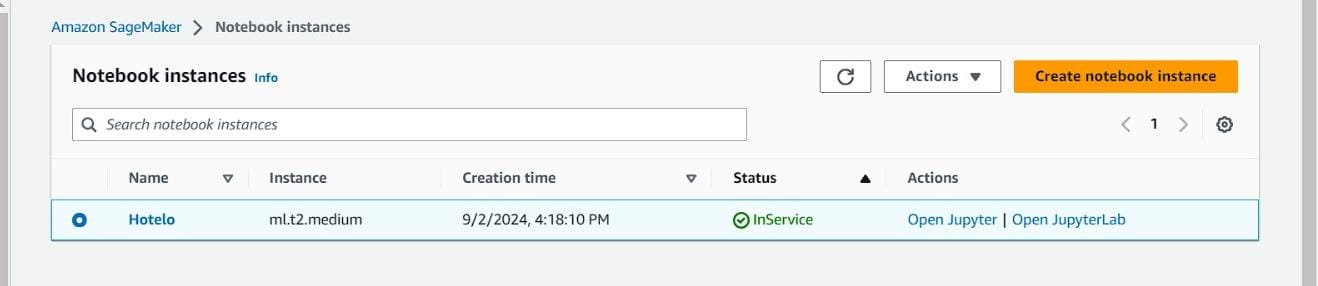

### CI/CD PIPIELINES

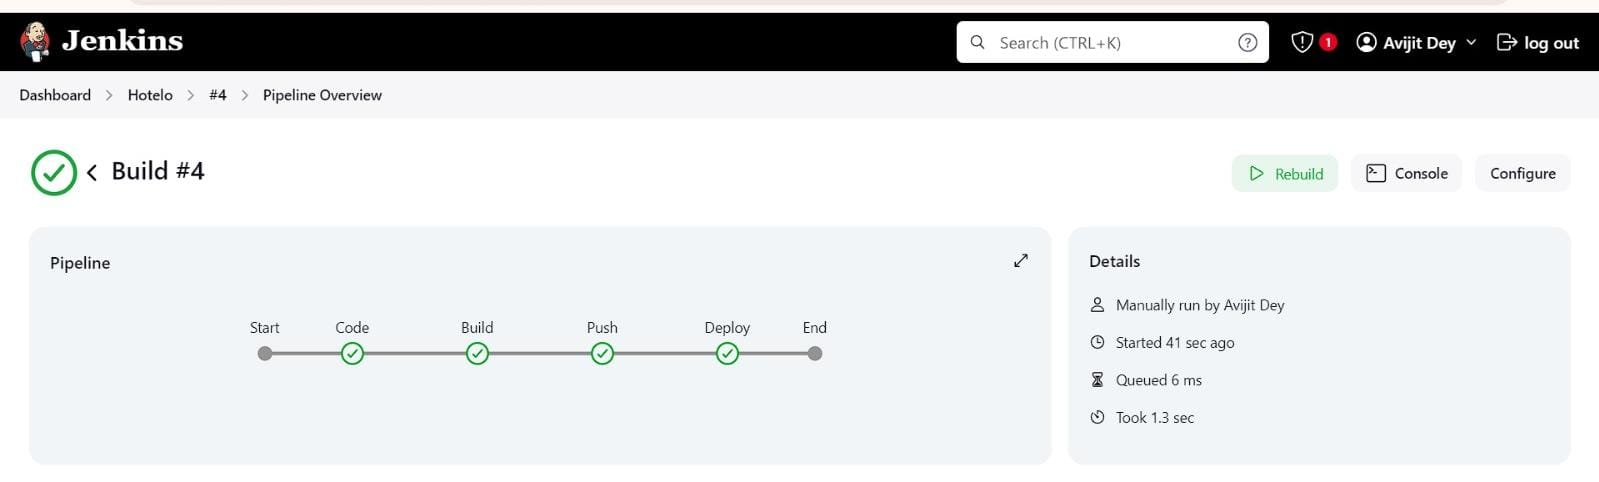

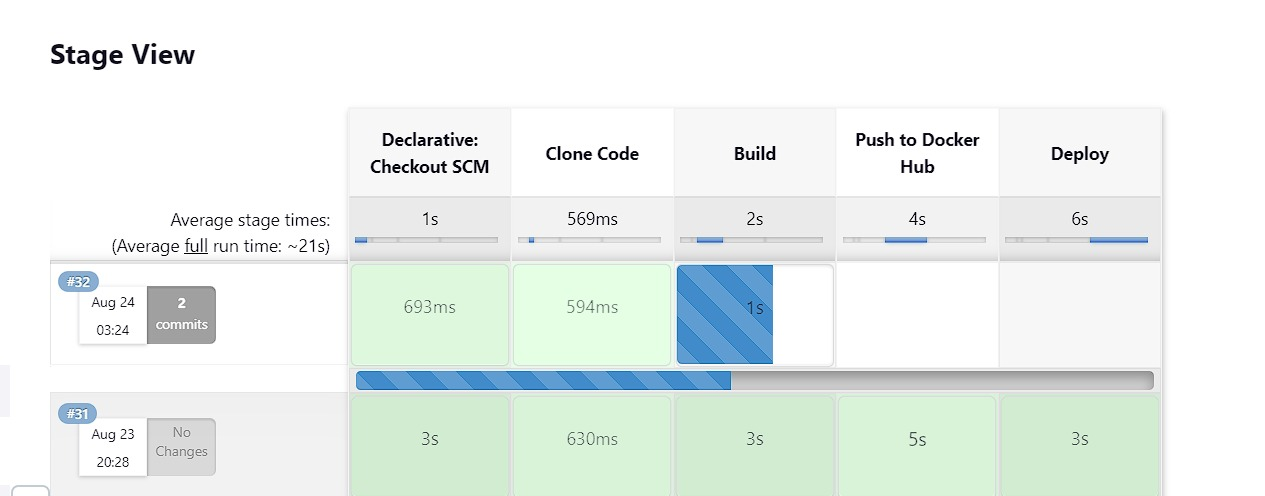

<br>
<br>

# INTERACTIVE  DASHBOARD

Tools Used: PowerBI

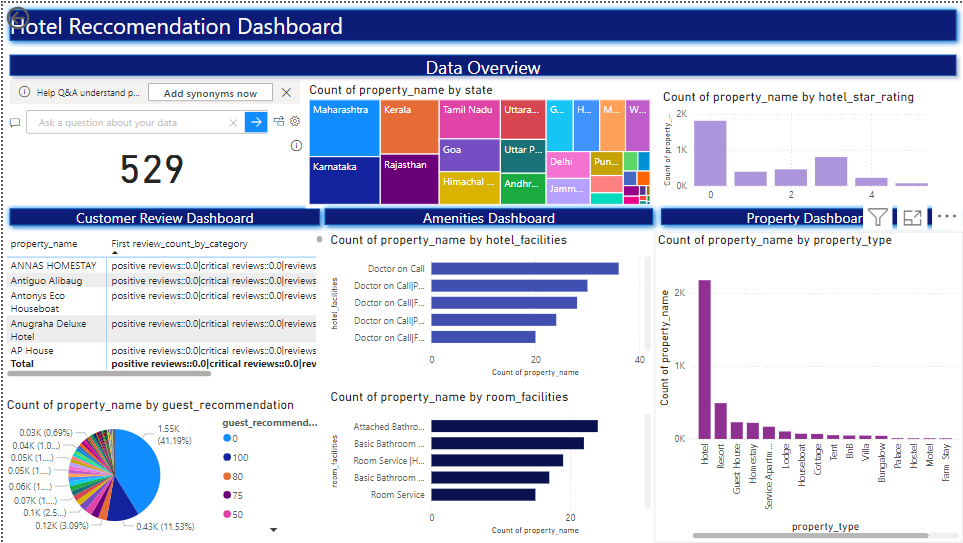

<br>
<br>

## USER INTERFACE AND USER EXPERIENCE 
Tools Used: Html, Tailwind CSS, Tailblocks, Figma

##### WEBPAGE

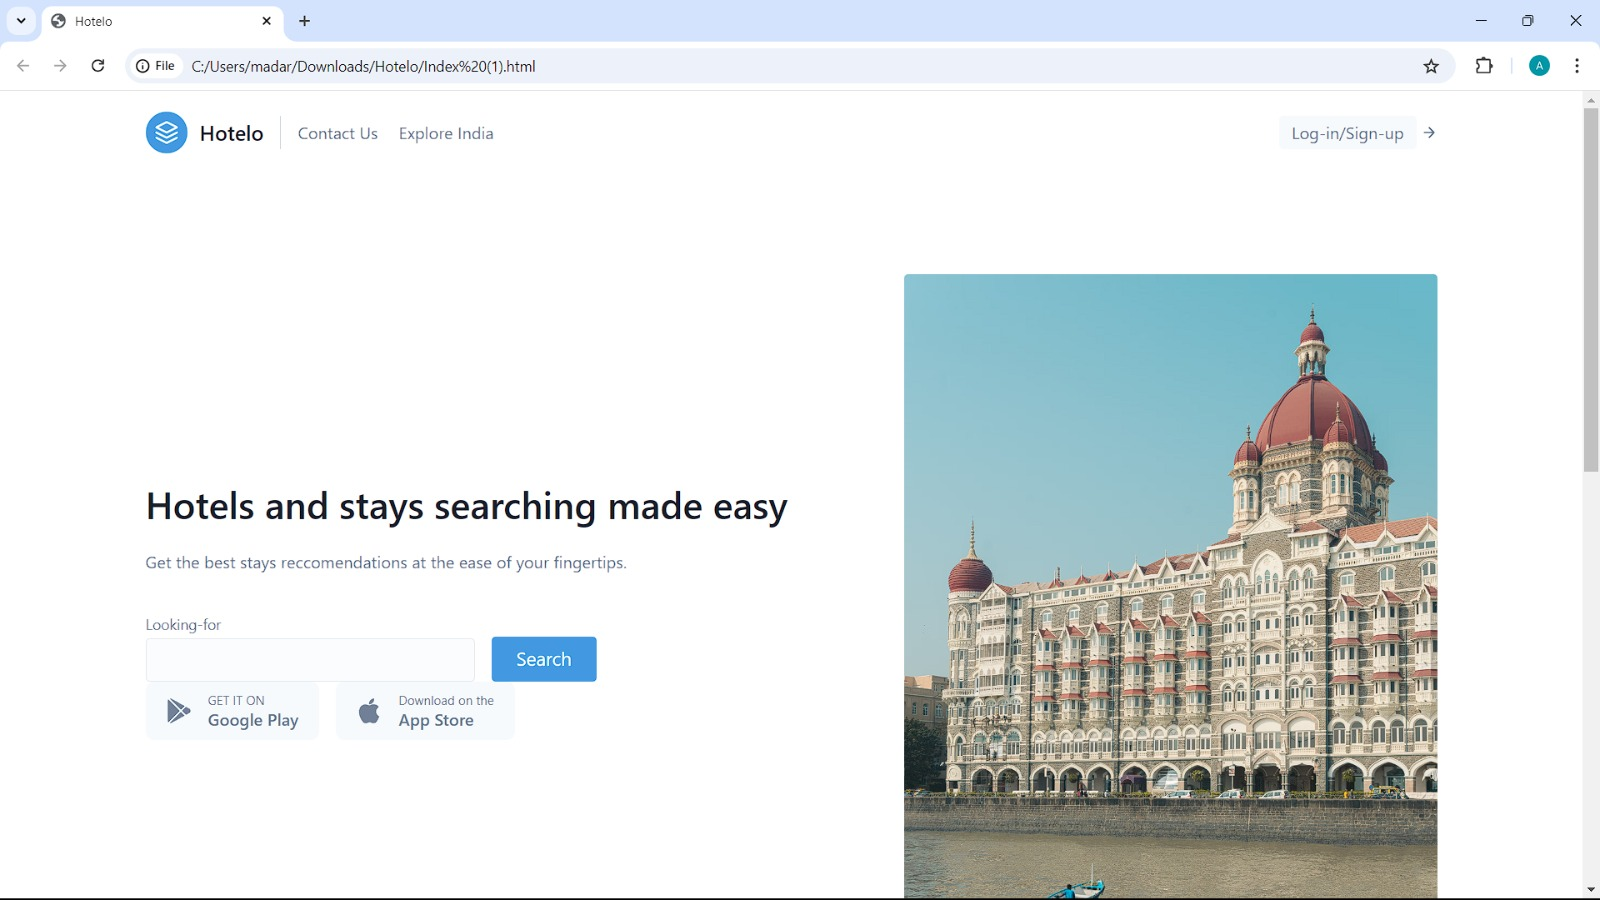

##### PHONE APP

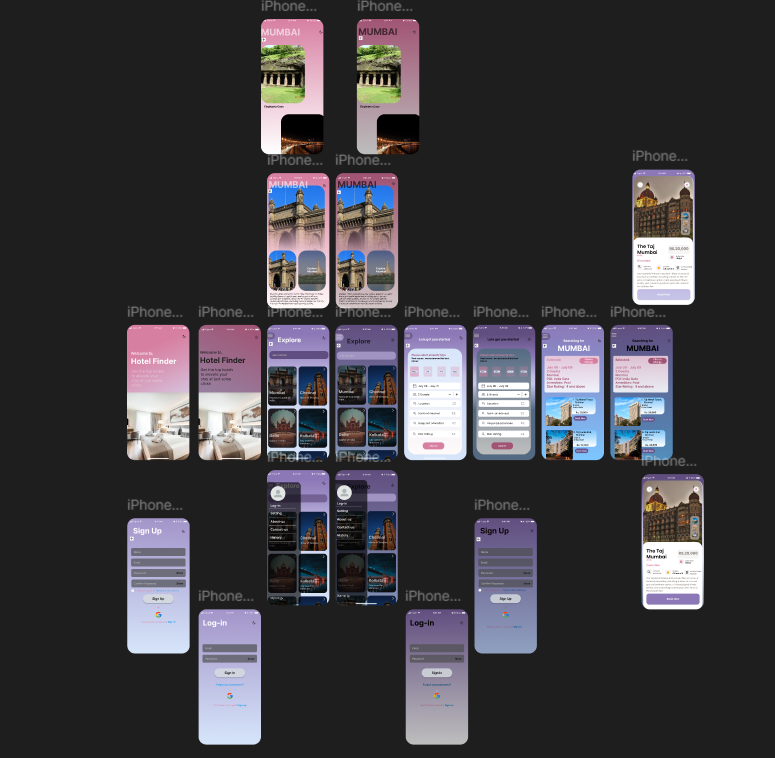